In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
#import openfermion as of
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#import covvqetools as cov

plt.rcParams.update({
  "text.usetex": True,
  #"font.family": "Helvetica"
})

In [2]:
yticks = generation.unique().tolist()
#yticks

NameError: name 'generation' is not defined

In [3]:
colors = list(sns.color_palette(None, len(yticks)))

NameError: name 'yticks' is not defined

In [ ]:
np.max(data[data['optimizer']=='ModelGrad'].epoch.to_list())

In [ ]:
#finding the unique hyperparams
hyper_param_list=[]
for opt in data['optimizer'].unique():
    for hyper_param in next(iter(data[data['optimizer']==opt].hyper_params[:1])).keys():
        hyper_param_list.append(hyper_param)
        
unique_hyper_params=list(set(hyper_param_list))

# 250 gens, higher trace for RG size 4

In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
#import openfermion as of
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#import covvqetools as cov

plt.rcParams.update({
  "text.usetex": True,
  #"font.family": "Helvetica"
})

notebook_path = os.path.dirname(os.path.realpath("__file__"))
#data_dir = notebook_path+'/optimizer_plot_data/optimizer_few_gens/rg_nact4/'
#data_dir = notebook_path+'/optimizer_plot_data/optimizer_few_gens/rg_nact4/fake_noise'
print(notebook_path)
data_dir = notebook_path+'/optimizer_hp_tuning_data/10000gens'

#hyperparam_subm_data_rg_1000gen_nact4_one_percent_v16_362117
data = pd.read_json(data_dir+'/all_data.json')

C:\Users\fgkri\Coding\PhD_notebooks\PhD_notebooks\Optimization_data


In [2]:
optimal_cost=data[data['optimizer']=='ModelGrad'].optimal_cost.unique()[0]
optimal_cost

4.7822974375000005

In [3]:
import openfermion as of
nact =4
rg_hamilt_dict = {"g": -0.9, "nact": nact}
npairs = nact // 2
rg_hamiltonian = of.hamiltonians.RichardsonGaudin(rg_hamilt_dict["g"], nact)
hamiltonian = rg_hamiltonian.qubit_operator
target_energy, target_state = of.linalg.jw_get_ground_state_at_particle_number(
of.get_sparse_operator(hamiltonian), npairs)
target_energy

4.782297437528603

In [4]:
for opt in data.opt_name.dropna().unique():
    print(f'Optimal hyperparameters for optimizer: {opt}')
    hp_params_dict=np.array(data[data['opt_name']==str(opt)].accepted_hyper_params)[-1]
    print(hp_params_dict, '\n')

Optimal hyperparameters for optimizer: SPSA
{'scaling_param': 0.097, 'scaling_exponent': 0.166, 'grad_scaling_param': 0.338, 'grad_scaling_exponent': 0.125, 'grad_stability_constant': 599, 'shots': 108137.502} 

Optimal hyperparameters for optimizer: ModelGrad
{'sample_radius': 0.894, 'learning_rate': 1.003, 'stability_constant': 8, 'eta': 0.243, 'sample_radius_decay_exponent': 0, 'rate_decay_exponent': 0.176, 'shots': 485} 

Optimal hyperparameters for optimizer: Rotosolve
{'shots': 50} 

Optimal hyperparameters for optimizer: ConjModelSearch
{'sample_radius': 2.137, 'learning_rate': 0.735, 'stability_constant': 5, 'eta': 0.5760000000000001, 'sample_radius_decay_exponent': 0, 'rate_decay_exponent': 0.08, 'shots': 3384} 

Optimal hyperparameters for optimizer: ConjModelGrad
{'sample_radius': 1.138, 'learning_rate': 0.301, 'stability_constant': 1, 'eta': 0.192, 'sample_radius_decay_exponent': 0, 'rate_decay_exponent': 0.12, 'shots': 700} 



In [5]:
unique_hyper_params=['sample_radius',
 'grad_scaling_exponent',
 'grad_stability_constant',
 'scaling_param',
 'sample_radius_decay_exponent',
 'grad_scaling_param',
 'eta',
 'learning_rate',
 'rate_decay_exponent',
 'scaling_exponent',
 'shots',
 'stability_constant']

In [6]:
unique_hp_dict={
    'sample_radius':'Sample Radius',
    'grad_scaling_exponent':"Gradient Scaling Exponent",
    'grad_stability_constant':"Gradient Stability Constant",
    'scaling_param':"Scaling parameter",
    'sample_radius_decay_exponent':"Sample Radius Decay Exponent" ,
    'grad_scaling_param':"Gradient Scaling Parameter",
    'eta':"Eta" ,
    'learning_rate':"Learning Rate",
    'rate_decay_exponent':"Learning Rate Decay Exponent",
    'scaling_exponent':"Scaling Exponent",
    'shots':"Shots",
    'stability_constant':"Stability Constant" 
}

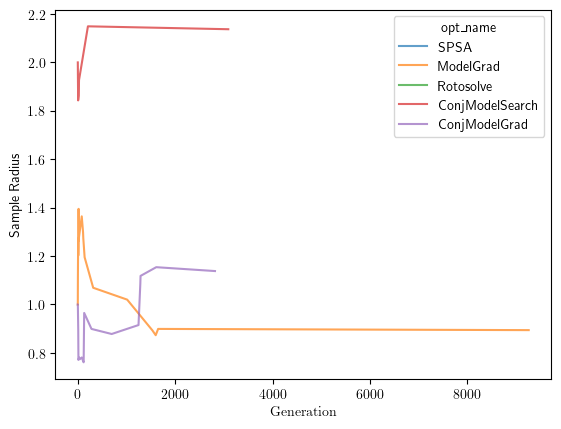

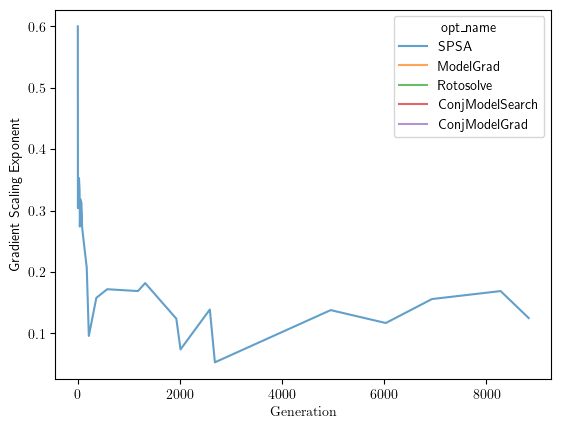

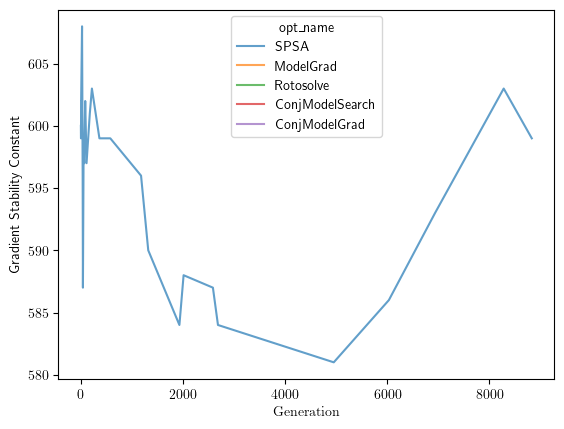

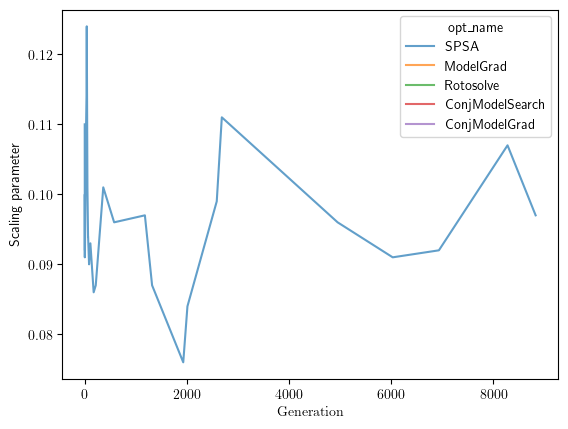

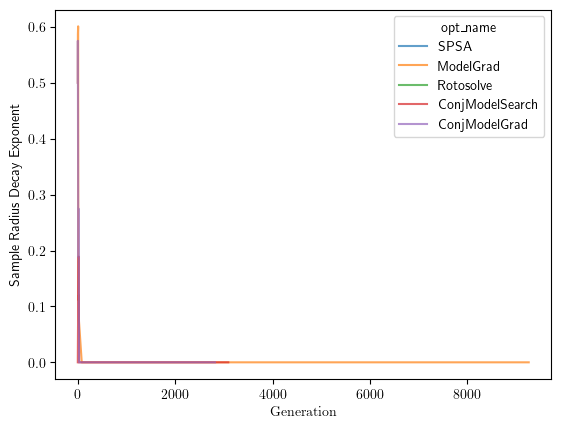

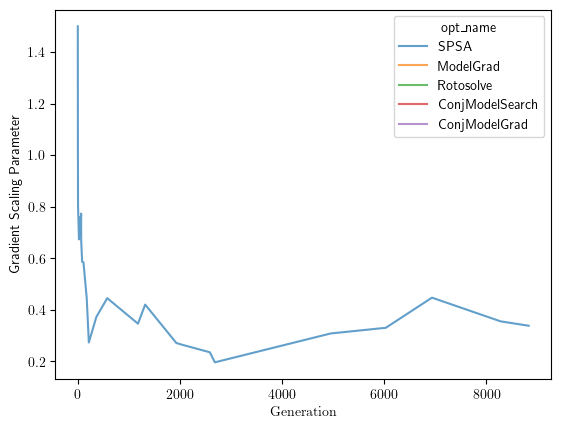

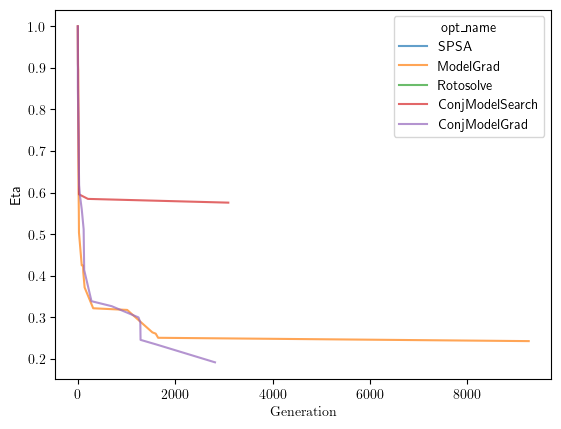

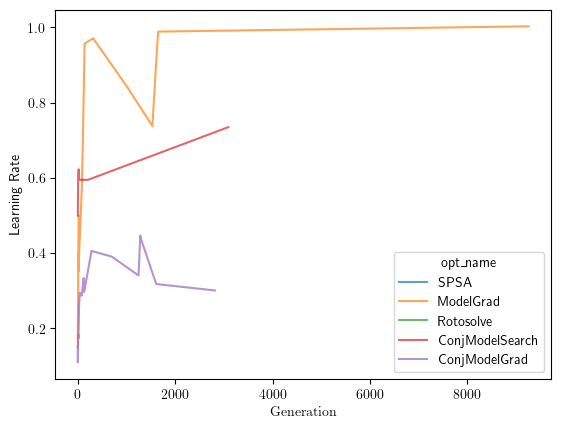

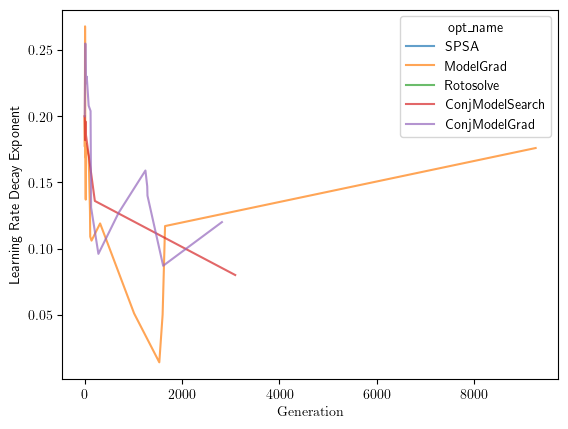

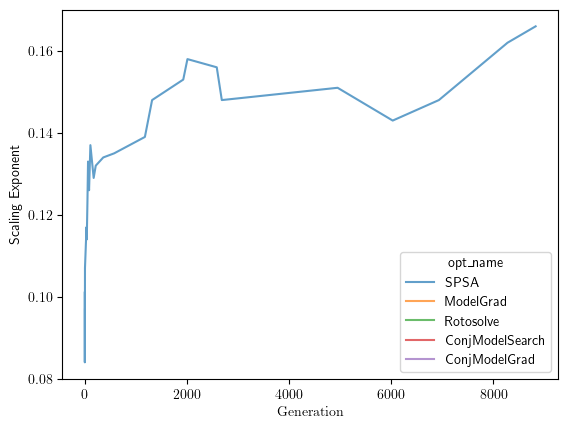

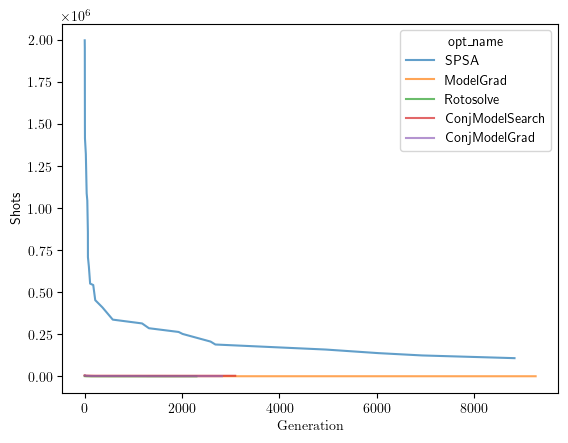

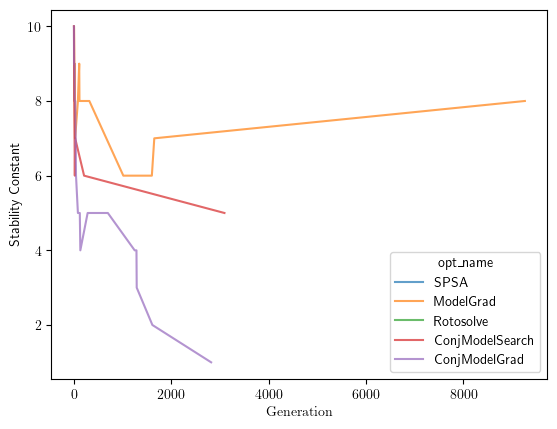

In [7]:
plot_kwargs = {
    'markers':True,
    'alpha':0.7,
    #'units':'optimizer_run',
    #'estimator':None,
    }
palette_colors = sns.color_palette('tab10')

#opt_list = ['ModelGrad', 'ConjModelGrad', 'ConjModelSearch']
#for opt in data['optimizer'].unique():
for hyper_param in unique_hyper_params:
        ax = sns.lineplot(
            data=data,
            y=hyper_param, 
            x='gen', 
            hue='opt_name',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
            **plot_kwargs
            )
        #ax.set(xscale="log")
        ax.set_xlabel(r'$\textrm{Generation}$')
        y_name=unique_hp_dict[hyper_param]
        ax.set_ylabel('{}'.format(y_name))
        plt.show()
        
#ax.set_xlabel('\\textit{time(s)')
#ax.set_ylabel('\\textit{Energy (a.u.)}')a

C:\Users\fgkri\AppData\Local\Temp\ipykernel_27596\2833131515.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(ylim=(0,180))


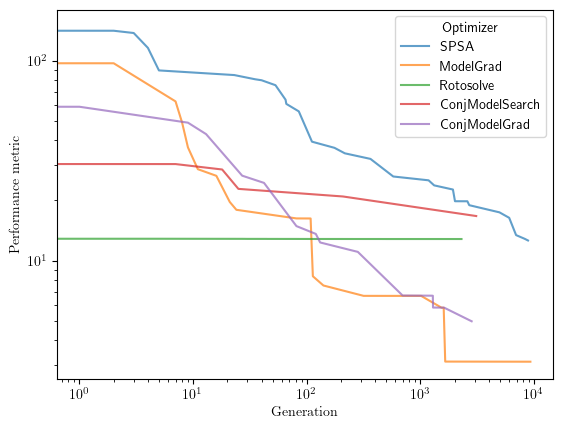

In [8]:
palette_colors = sns.color_palette('tab10')

ax = sns.lineplot(
        data=data,#filtdata,
        y='performance_metric', 
        x='gen', 
        hue='opt_name',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
        **plot_kwargs
        )
ax.set(yscale="log")
ax.set(xscale="log")
ax.set_ylabel(r'$\textrm{Performance metric}$')
ax.set_xlabel(r'$\textrm{Generation}$')
ax.set(ylim=(0,180))
ax.legend(title="Optimizer")
from pathlib import Path
out_path=notebook_path+"/optimizer_hp_tuning_plots/performance_metrics.pdf"
Path(out_path).parent.mkdir(parents=True, exist_ok=True)
plt.savefig(out_path)
plt.show()


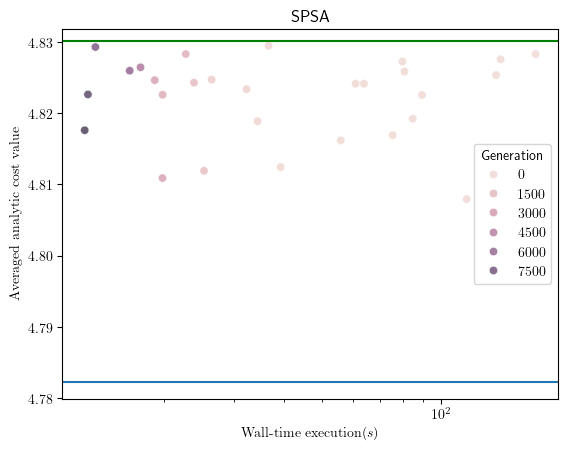

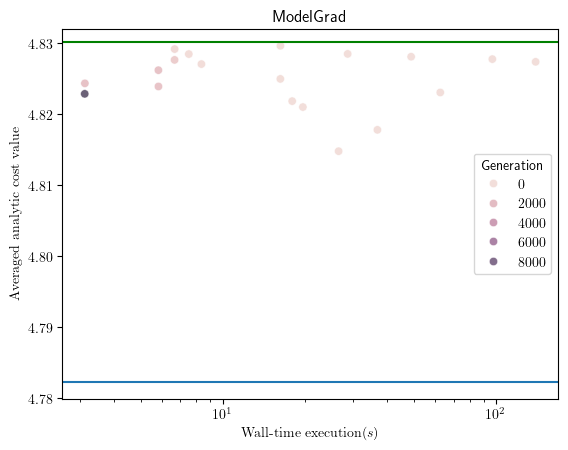

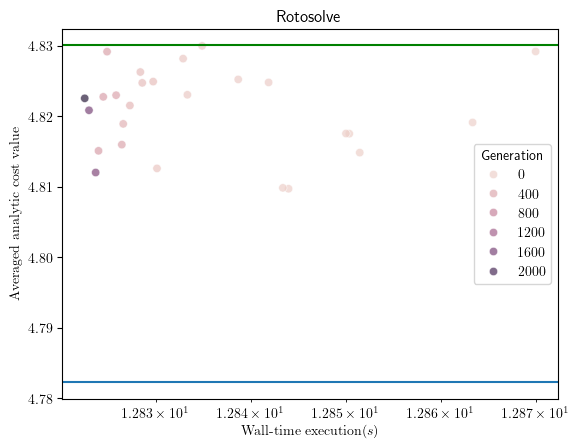

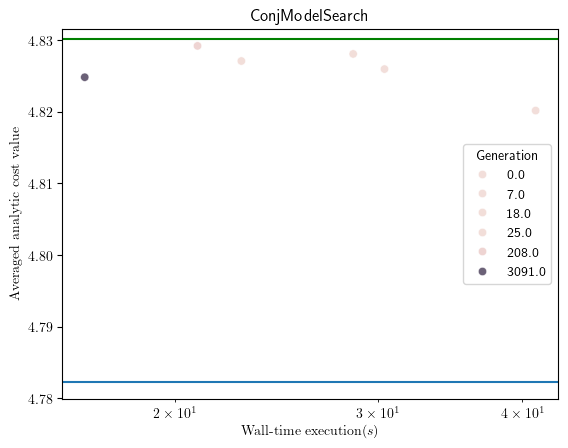

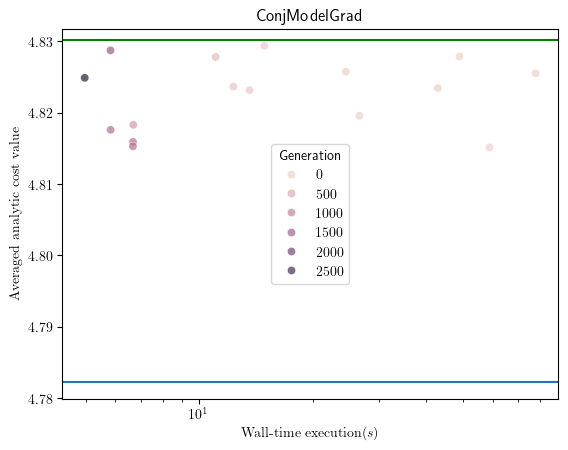

In [9]:
for opt in data.opt_name.dropna().unique():
    filt_data = data[data['opt_name']==opt]
    ax = sns.scatterplot(
        data=filt_data,
        y='averaged_analytic_cost_value',
        x='full_optimization_walltime', 
        hue='gen',
        #style='opt_name',
        #units='optimizer_run',
        #hue_order=hue_order,
        #palette=palette_dict,
        #err_style='band',
        **plot_kwargs
        )
    ax.set(xscale="log")
    #ax.set(yscale="log")
    plt.axhline(y=optimal_cost)
    #plt.axhline(y=optimal_cost+1e-3, color='g', label='etol')
    plt.axhline(y=optimal_cost+1e-2*optimal_cost, color='g')
    ax.set_ylabel(r'$\textrm{Averaged analytic cost value}$')
    ax.set_xlabel(r'$\textrm{Wall-time execution} (s)$')
    plt.title('{}'.format(opt))
    ax.legend(title="Generation")
    #plt.axhline(y=target_energy, color='r', label='true_target')
    from pathlib import Path
    out_path=notebook_path+"/optimizer_hp_tuning_plots/avg_analytic_cost_values_over_walltime/"+str(opt)+"_avg_an_cv_over_walltime.pdf"
    Path(out_path).parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(out_path)
    plt.show()

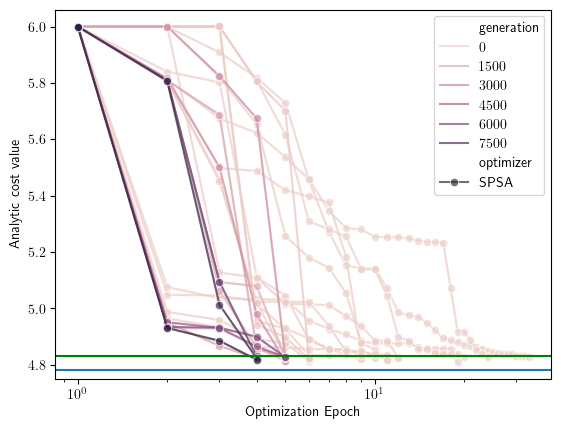

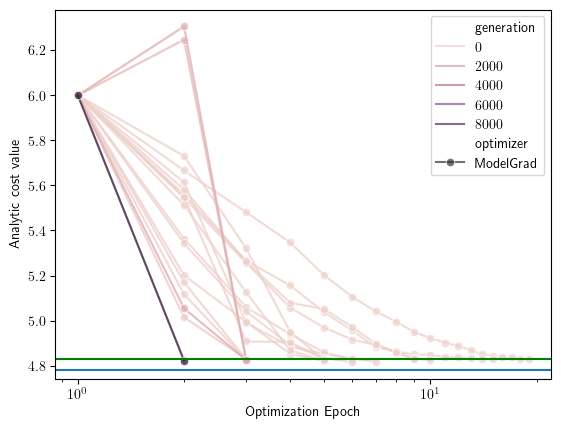

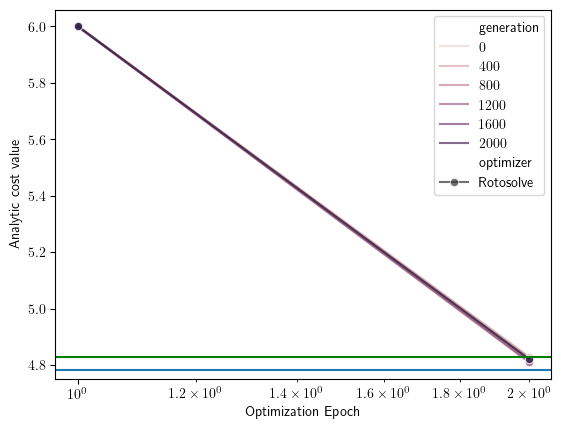

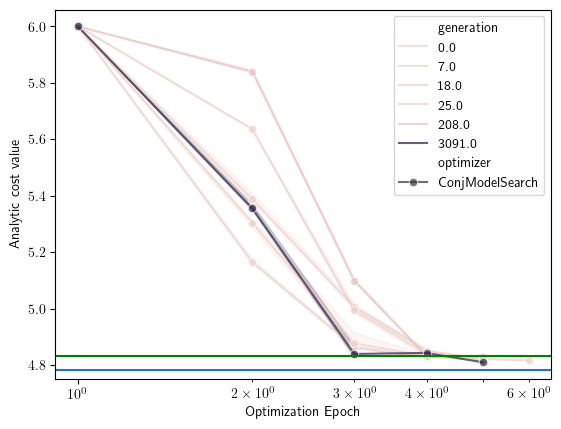

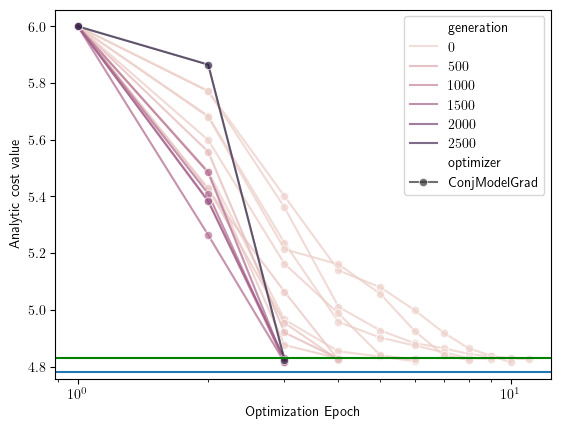

In [86]:
for opt in data.opt_name.dropna().unique():
    filt_data = data[data['optimizer']==opt]
    ax = sns.lineplot(
        data=filt_data,
        y='analytic_cost_value', 
        x='epoch',#'wall_time_execution', 
        hue='generation',
        style='optimizer',
        #units='optimizer_run',
        #hue_order=hue_order,
        #palette=palette_dict,
        #err_style='band',
        **plot_kwargs
        )
    ax.set(xscale="log")
    #ax.set(yscale="log")
    plt.axhline(y=optimal_cost)
    #plt.axhline(y=target_energy, color='r', label='true_target')
    #plt.axhline(y=optimal_cost+1e-3, color='g', label='etol')
    plt.axhline(y=optimal_cost+1e-2*optimal_cost, color='g', label='etol')
    ax.set_ylabel(r'$\textrm{Analytic cost value}$')
    ax.set_xlabel(r'$\textrm{Optimization Epoch}$')
    from pathlib import Path
    out_path=notebook_path+"/optimizer_hp_tuning_plots/analytic_cost_values_over_epochs/"+str(opt)+"_an_cv_over_epochs.pdf"
    Path(out_path).parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(out_path)
    plt.show()

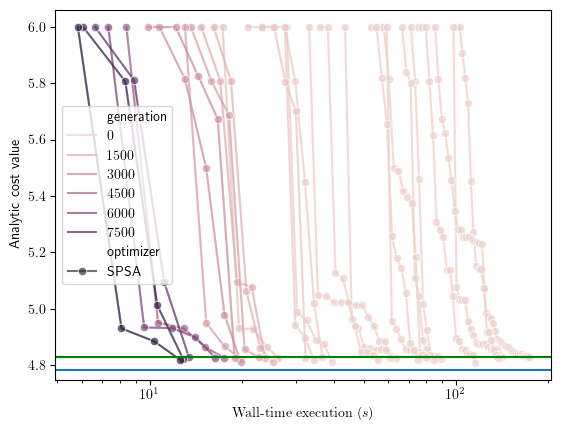

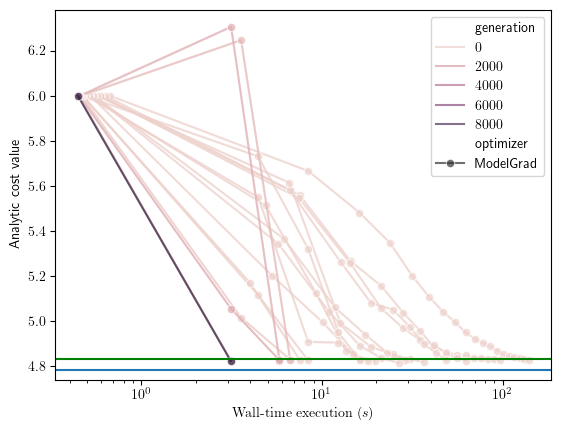

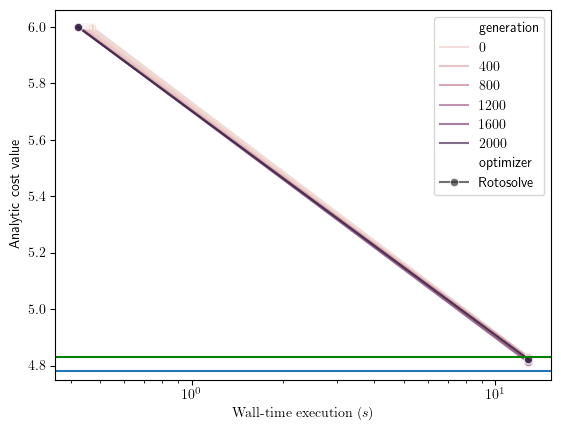

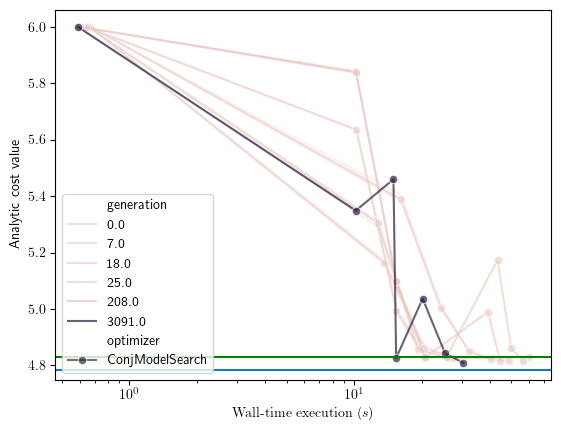

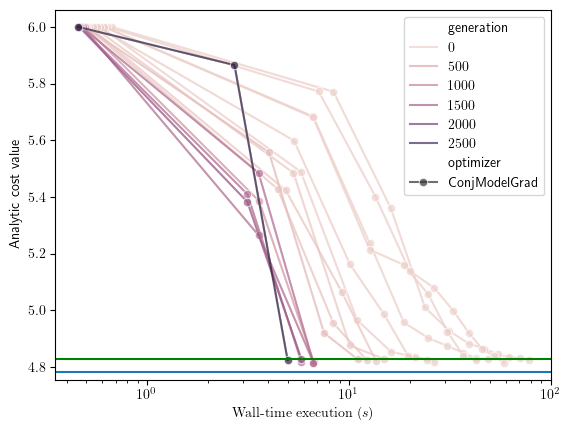

In [87]:
for opt in data.opt_name.dropna().unique():
    filt_data = data[data['optimizer']==opt]
    ax = sns.lineplot(
        data=filt_data,
        y='analytic_cost_value', 
        x='wall_time_execution', 
        hue='generation',
        style='optimizer',
        #units='optimizer_run',
        #hue_order=hue_order,
        #palette=palette_dict,
        #err_style='band',
        **plot_kwargs
        )
    ax.set(xscale="log")
    #ax.set(yscale="log")
    plt.axhline(y=optimal_cost)
    #plt.axhline(y=target_energy, color='r', label='true_target')
    plt.axhline(y=optimal_cost+1e-2*optimal_cost, color='g', label='etol')
    #plt.axhline(y=optimal_cost+1e-3, color='g', label='etol')
    ax.set_ylabel('r$\textrm{Analytic cost value}')
    ax.set_xlabel(r'$\textrm{Wall-time execution }(s)$')
    from pathlib import Path
    out_path=notebook_path+"/optimizer_plot_outputs/analytic_cost_values_over_walltime/"+str(opt)+"_an_cv_over_walltime.pdf"
    Path(out_path).parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(out_path)
    plt.show()

# device/real shot noise

In [29]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
#import openfermion as of
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import covvqetools as cov

plt.rcParams.update({
  "text.usetex": True,
  #"font.family": "Helvetica"
})

notebook_path = os.path.dirname(os.path.realpath("__file__"))
#data_dir = notebook_path+'/optimizer_plot_data/optimizer_few_gens/rg_nact4/'
#data_dir = notebook_path+'/optimizer_plot_data/optimizer_many_gens/rg_nact4/perturbed'
data_dir = notebook_path+'/optimizer_plot_data/optimizer_few_gens/rg_nact4/device_noise'
data = pd.read_json(data_dir+'/all_data.json')

In [30]:
print(np.array(data[data['opt_name']=='ConjModelSearch'].accepted_hyper_params)[-1])
print(np.array(data[data['opt_name']=='ConjModelGrad'].accepted_hyper_params)[-1])
print(np.array(data[data['opt_name']=='ModelGrad'].accepted_hyper_params)[-1])
print(np.array(data[data['opt_name']=='SPSA'].accepted_hyper_params)[-1])
print(np.array(data[data['opt_name']=='Rotosolve'].accepted_hyper_params)[-1])

{'sample_radius': 0.1, 'learning_rate': 0.719, 'stability_constant': 51, 'eta': 0.1, 'sample_radius_decay_exponent': 0, 'rate_decay_exponent': 0.525, 'shots': 500}
{'sample_radius': 0.7030000000000001, 'learning_rate': 0.552, 'stability_constant': 16, 'eta': 0.1, 'sample_radius_decay_exponent': 0.656, 'rate_decay_exponent': 0.335, 'shots': 500}
{'sample_radius': 0.1, 'learning_rate': 1.051, 'stability_constant': 74, 'eta': 0.1, 'sample_radius_decay_exponent': 1, 'rate_decay_exponent': 0.159, 'shots': 500}
{'scaling_param': 0.391, 'scaling_exponent': 0.161, 'grad_scaling_param': 0.904, 'grad_scaling_exponent': 0.397, 'grad_stability_constant': 184, 'shots': 72690}
{'shots': 500}


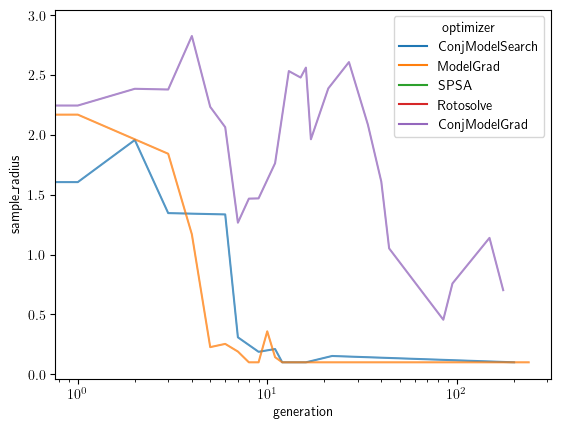

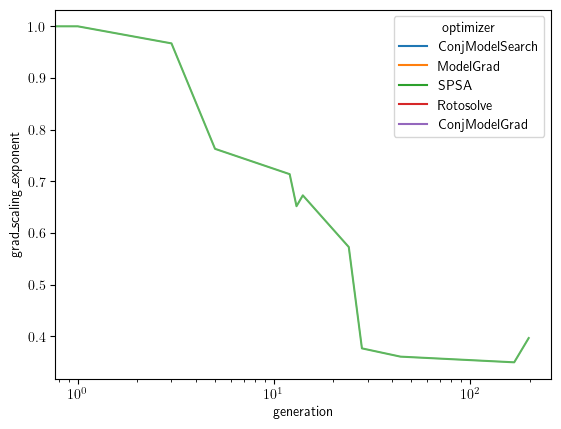

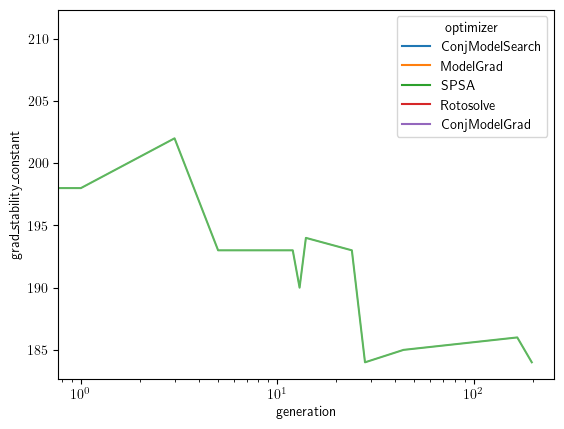

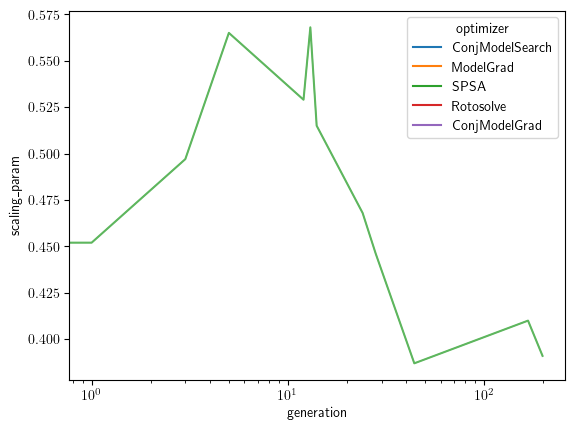

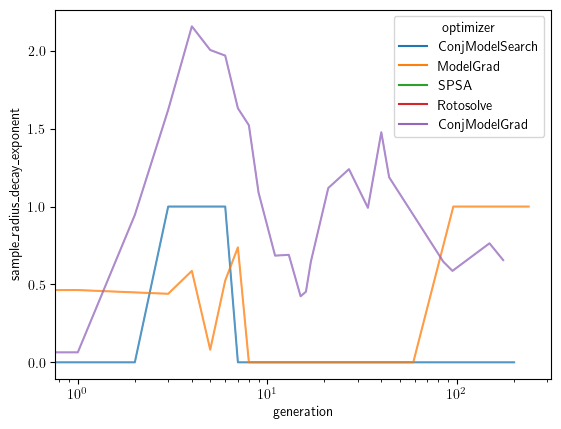

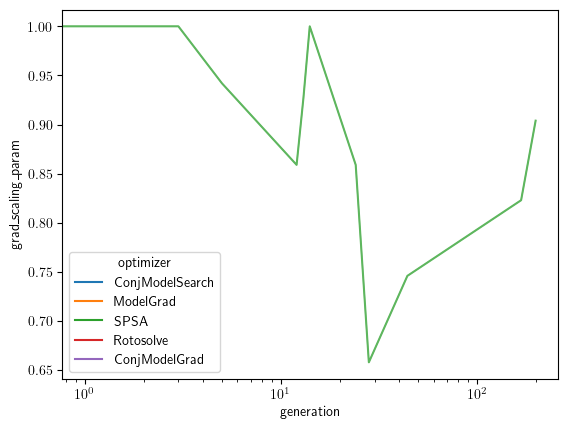

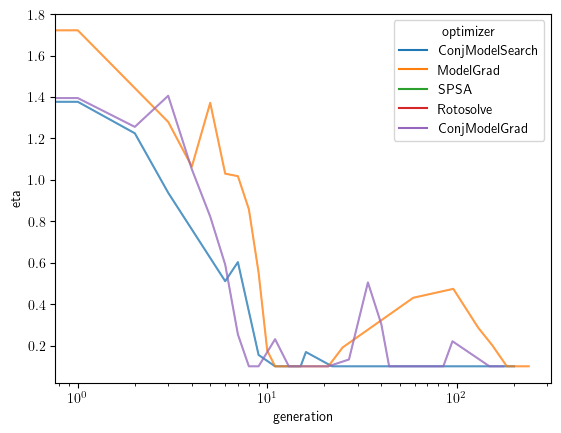

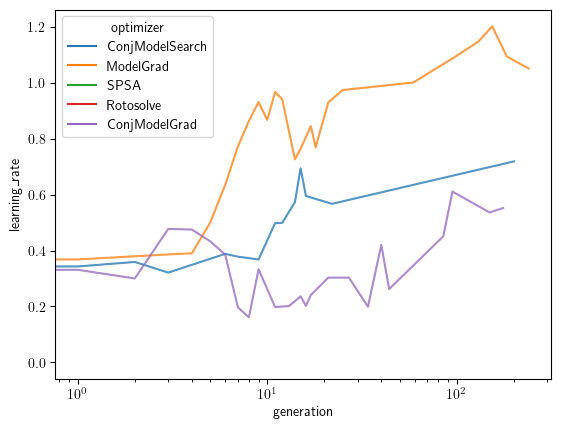

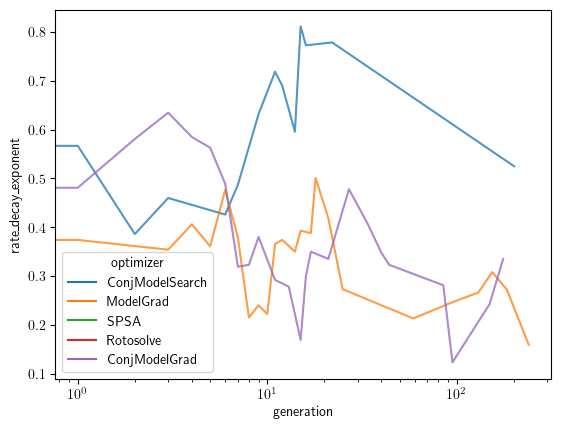

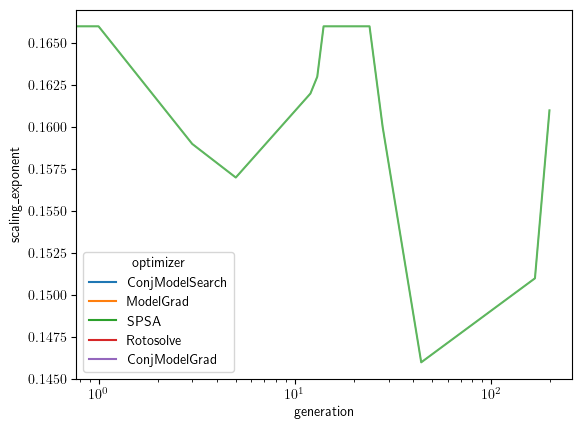

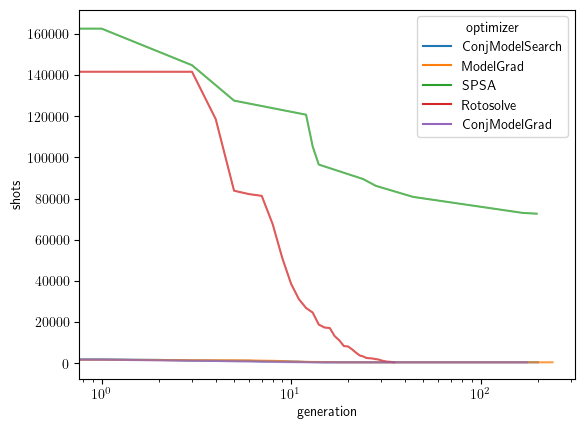

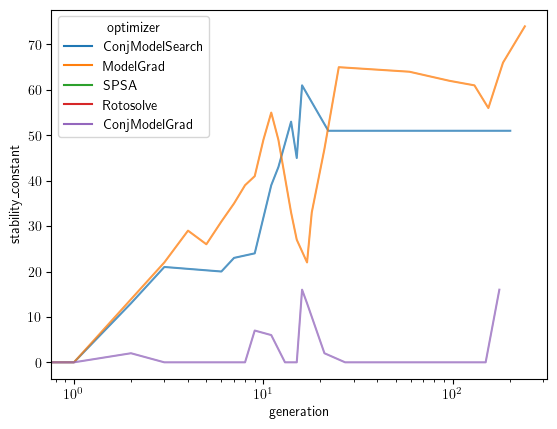

In [31]:
#unique_hyper_params=list(set(hyper_param_list))

plot_kwargs = {
    'markers':True,
    'alpha':0.7,
    #'units':'optimizer_run',
    #'estimator':None,
    }
palette_colors = sns.color_palette('tab10')

#opt_list = ['ModelGrad', 'ConjModelGrad', 'ConjModelSearch']
#for opt in data['optimizer'].unique():
for hyper_param in unique_hyper_params:
        ax = sns.lineplot(
            data=data,
            y=hyper_param, 
            x='generation', 
            hue='optimizer',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
            **plot_kwargs
            )
        ax.set(xscale="log")
        plt.show()
        
#ax.set_xlabel('\\textit{time(s)')
#ax.set_ylabel('\\textit{Energy (a.u.)}')a

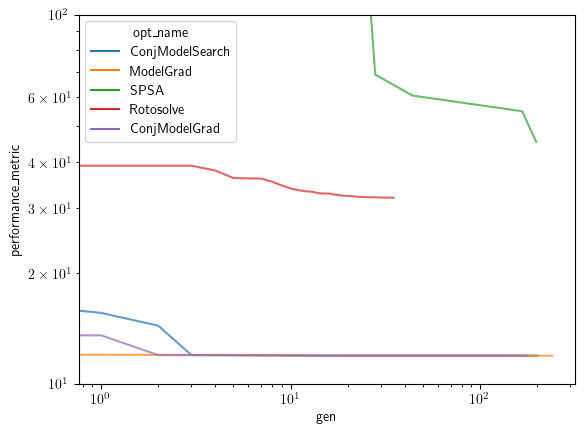

In [35]:
palette_colors = sns.color_palette('tab10')

ax = sns.lineplot(
        data=data,#filtdata,
        y='performance_metric', 
        x='gen', 
        hue='opt_name',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
        **plot_kwargs
        )
ax.set(yscale="log")
ax.set(xscale="log")
ax.set(ylim=(10,100))
plt.show()

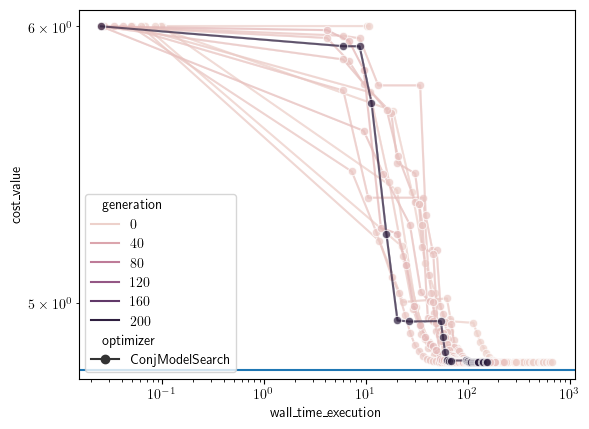

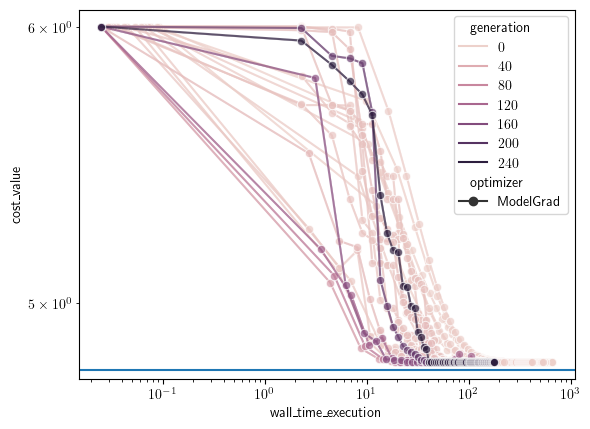

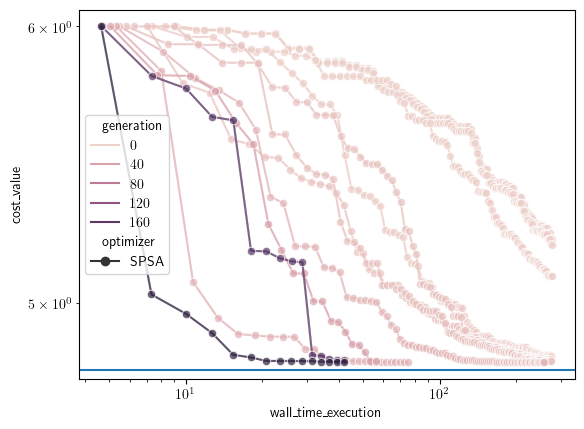

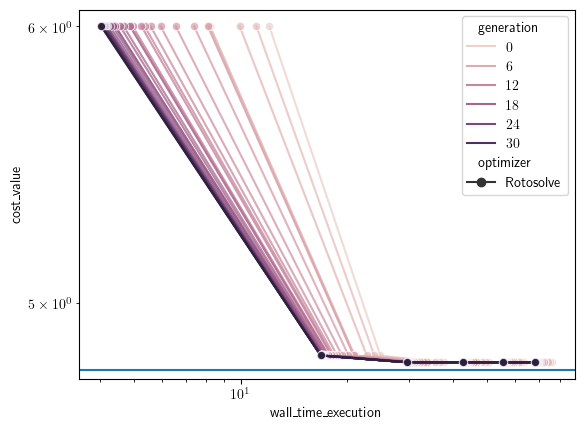

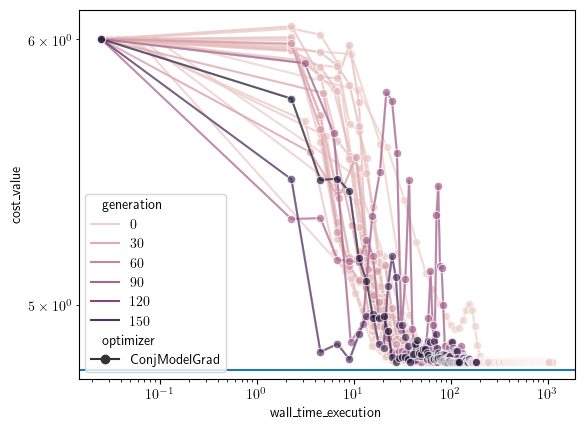

In [36]:
for opt in data.opt_name.dropna().unique():
    filt_data = data[data['optimizer']==opt]
    ax = sns.lineplot(
        data=filt_data,
        y='cost_value', 
        x='wall_time_execution', 
        hue='generation',
        style='optimizer',
        #units='optimizer_run',
        #hue_order=hue_order,
        #palette=palette_dict,
        #err_style='band',
        **plot_kwargs
        )
    ax.set(xscale="log")
    ax.set(yscale="log")
    plt.axhline(y=optimal_cost)
    plt.show()

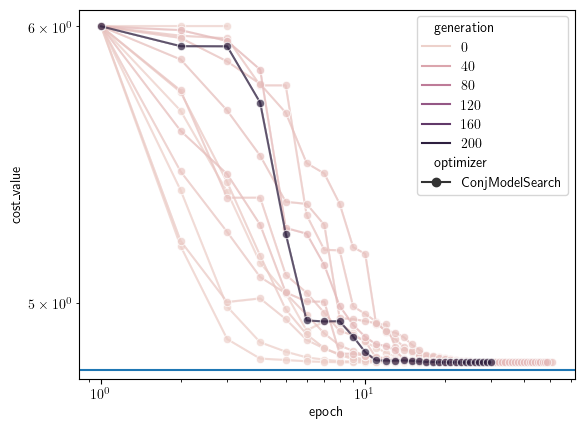

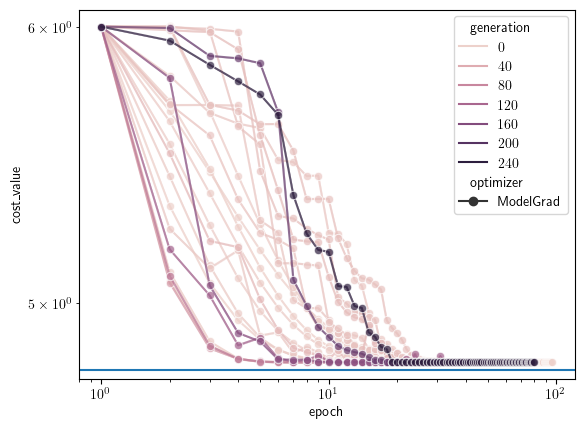

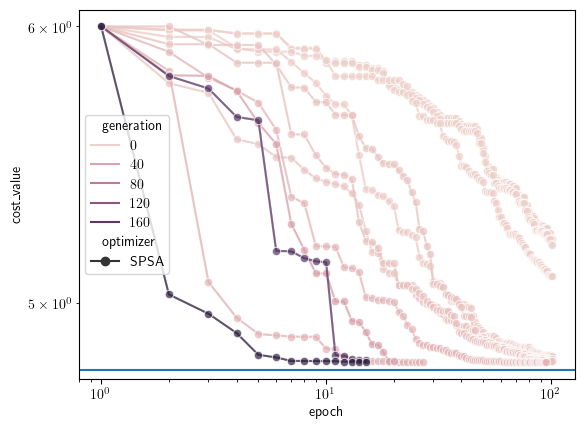

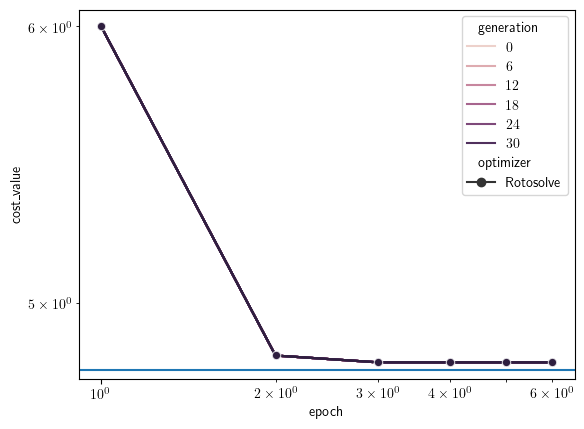

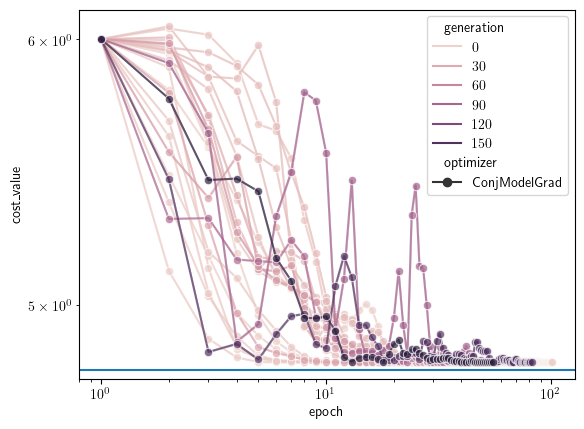

In [37]:
for opt in data.opt_name.dropna().unique():
    filt_data = data[data['optimizer']==opt]
    ax = sns.lineplot(
        data=filt_data,
        y='cost_value', 
        x='epoch',#'wall_time_execution', 
        hue='generation',
        style='optimizer',
        #units='optimizer_run',
        #hue_order=hue_order,
        #palette=palette_dict,
        #err_style='band',
        **plot_kwargs
        )
    ax.set(xscale="log")
    ax.set(yscale="log")
    plt.axhline(y=optimal_cost)
    plt.show()

# fake shot noise

In [6]:

notebook_path = os.path.dirname(os.path.realpath("__file__"))
#data_dir = notebook_path+'/optimizer_plot_data/optimizer_few_gens/rg_nact4/'
#data_dir = notebook_path+'/optimizer_plot_data/optimizer_many_gens/rg_nact4/perturbed'
data_dir = notebook_path+'/optimizer_plot_data/optimizer_few_gens/rg_nact4/fake_noise'
data = pd.read_json(data_dir+'/all_data.json')

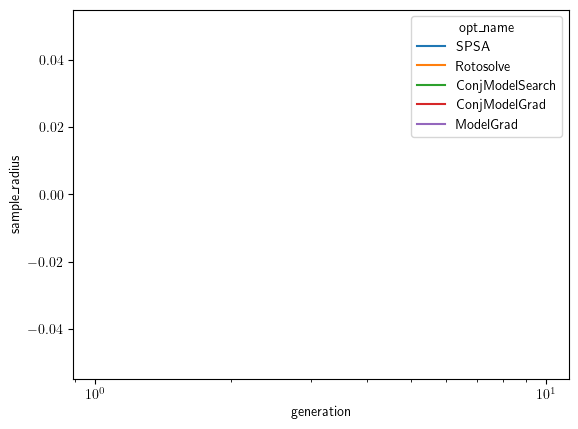

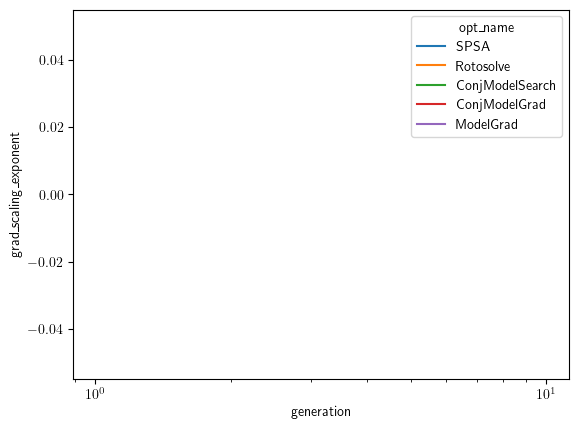

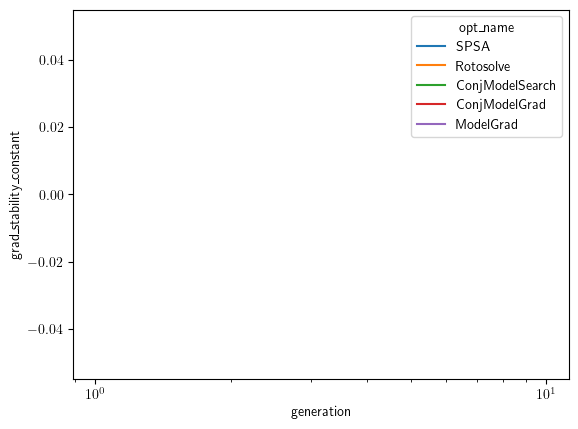

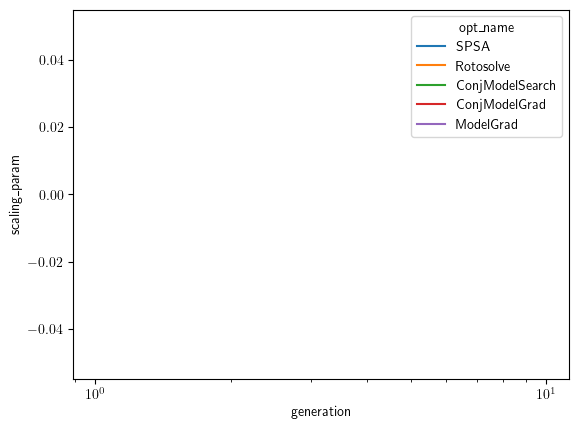

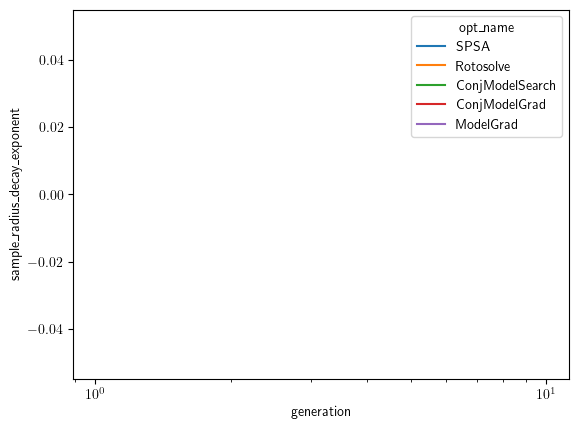

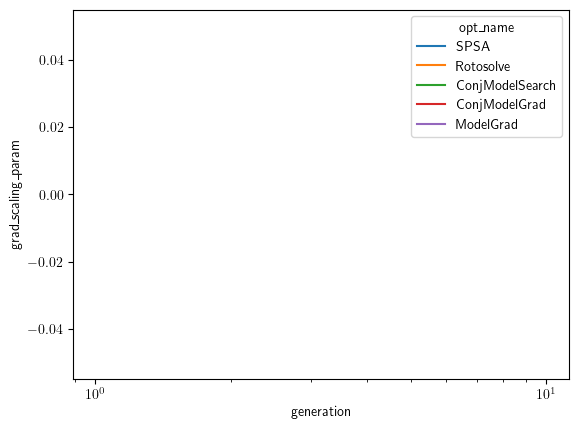

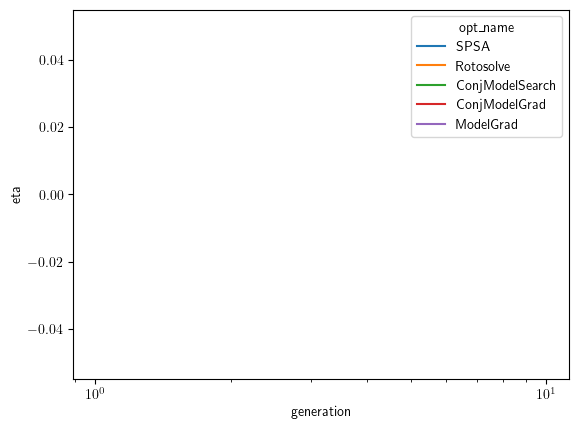

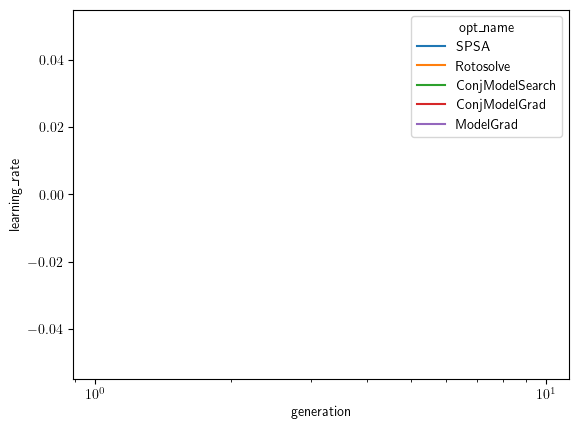

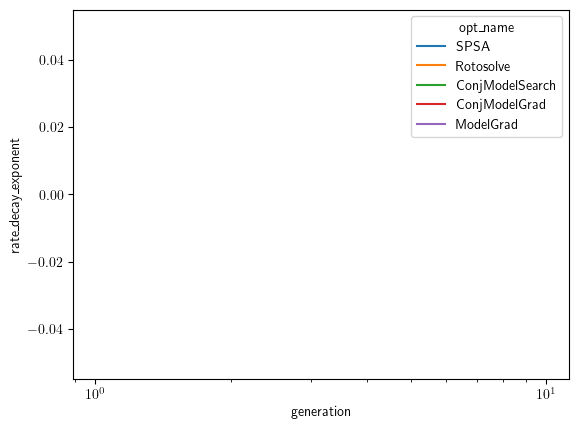

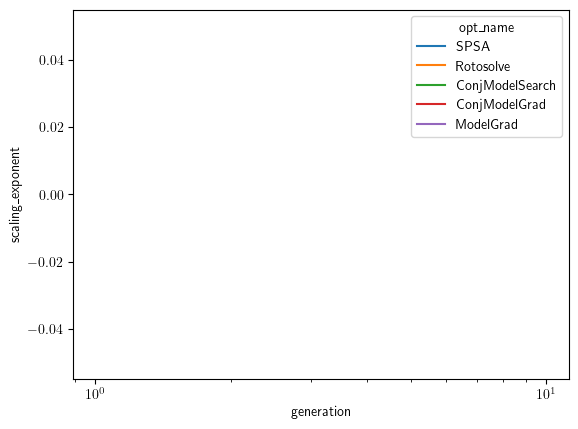

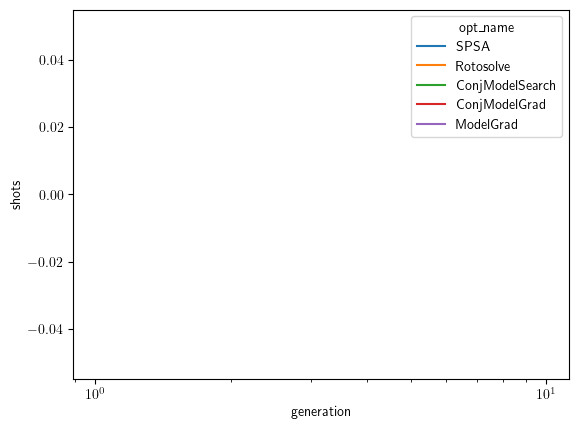

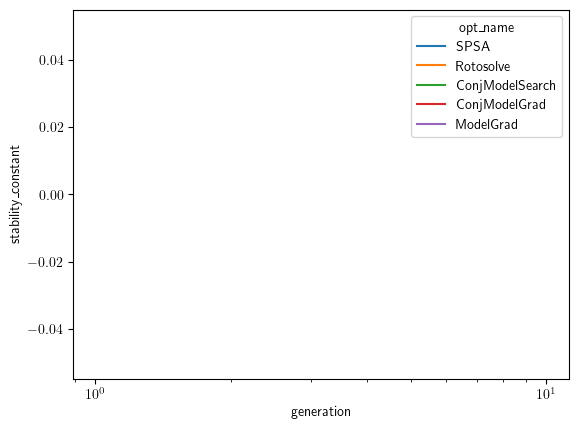

In [7]:


plot_kwargs = {
    'markers':True,
    'alpha':0.7,
    #'units':'optimizer_run',
    #'estimator':None,
    }
palette_colors = sns.color_palette('tab10')

#opt_list = ['ModelGrad', 'ConjModelGrad', 'ConjModelSearch']
#for opt in data['optimizer'].unique():
for hyper_param in unique_hyper_params:
        ax = sns.lineplot(
            data=data,
            y=hyper_param, 
            x='generation', 
            hue='opt_name',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
            **plot_kwargs
            )
        ax.set(xscale="log")
        plt.show()
        
#ax.set_xlabel('\\textit{time(s)')
#ax.set_ylabel('\\textit{Energy (a.u.)}')a

In [8]:
palette_colors = sns.color_palette('tab10')

ax = sns.lineplot(
        data=data,#filtdata,
        y='performance_metric', 
        x='generation', 
        hue='opt_name',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
        **plot_kwargs
        )
ax.set(yscale="log")
ax.set(xscale="log")
ax.set(ylim=(0.,100))
plt.show()

/tmp/ipykernel_440/3009927600.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(ylim=(0.,100))


ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 640x480 with 1 Axes>

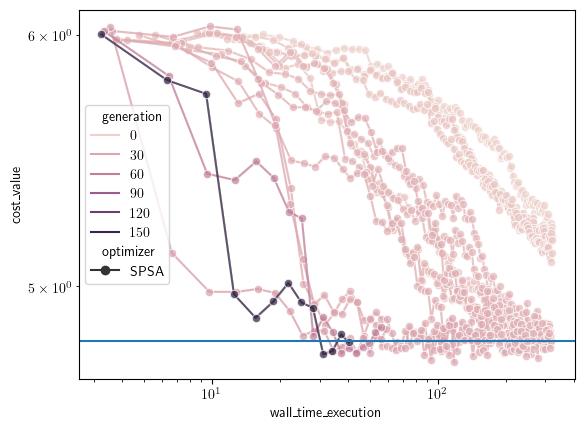

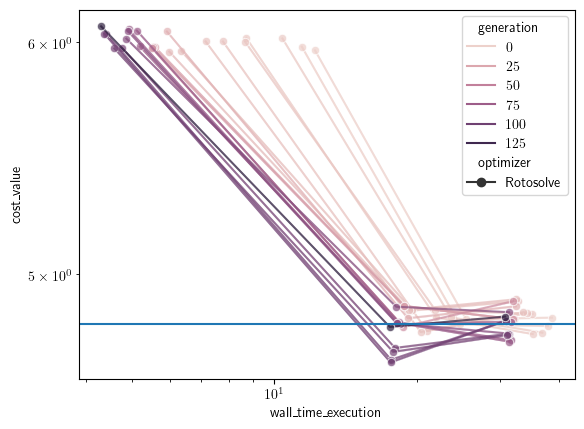

KeyboardInterrupt: 

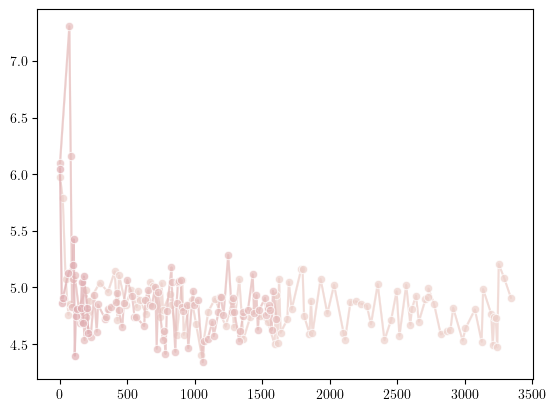

In [9]:
for opt in data.opt_name.dropna().unique():
    filt_data = data[data['optimizer']==opt]
    ax = sns.lineplot(
        data=filt_data,
        y='cost_value', 
        x='wall_time_execution', 
        hue='generation',
        style='optimizer',
        #units='optimizer_run',
        #hue_order=hue_order,
        #palette=palette_dict,
        #err_style='band',
        **plot_kwargs
        )
    ax.set(xscale="log")
    ax.set(yscale="log")
    plt.axhline(y=optimal_cost)
    plt.show()

In [ ]:
for opt in data.opt_name.dropna().unique():
    filt_data = data[data['optimizer']==opt]
    ax = sns.lineplot(
        data=filt_data,
        y='cost_value', 
        x='epoch',#'wall_time_execution', 
        hue='generation',
        style='optimizer',
        #units='optimizer_run',
        #hue_order=hue_order,
        #palette=palette_dict,
        #err_style='band',
        **plot_kwargs
        )
    ax.set(xscale="log")
    ax.set(yscale="log")
    plt.axhline(y=optimal_cost)
    plt.show()

# 1k gens, minimal trace, RG size 4

## no shot noise

In [203]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
#import openfermion as of
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import covvqetools as cov

plt.rcParams.update({
  "text.usetex": True,
  #"font.family": "Helvetica"
})

notebook_path = os.path.dirname(os.path.realpath("__file__"))
#data_dir = notebook_path+'/optimizer_plot_data/optimizer_few_gens/rg_nact4/'
data_dir = notebook_path+'/optimizer_plot_data/optimizer_many_gens/rg_nact4/perturbed'
data = pd.read_json(data_dir+'/all_data.json')

In [214]:
for name in data.opt_name.dropna().unique():
    print('Optimizer {} \n'.format(name), data[data['opt_name']==name].accepted_hyper_params.iloc[-1], '\n')

Optimizer Rotosolve 
 {'shots': 36592} 

Optimizer ConjModelGrad 
 {'sample_radius': 1.6360000000000001, 'learning_rate': 0.789, 'stability_constant': 33, 'eta': 0.196, 'sample_radius_decay_exponent': 0, 'rate_decay_exponent': 0.292, 'shots': 500} 

Optimizer ModelGrad 
 {'sample_radius': 0.926, 'learning_rate': 0.6900000000000001, 'stability_constant': 71, 'eta': 0.1, 'sample_radius_decay_exponent': 0, 'rate_decay_exponent': 0.786, 'shots': 500} 

Optimizer ConjModelSearch 
 {'sample_radius': 2.124, 'learning_rate': 0.40700000000000003, 'stability_constant': 38, 'eta': 0.1, 'sample_radius_decay_exponent': 0, 'rate_decay_exponent': 0.222, 'shots': 500} 

Optimizer SPSA 
 {'scaling_param': 0.34400000000000003, 'scaling_exponent': 0.11, 'grad_scaling_param': 0.927, 'grad_scaling_exponent': 0.456, 'grad_stability_constant': 178, 'shots': 23485} 



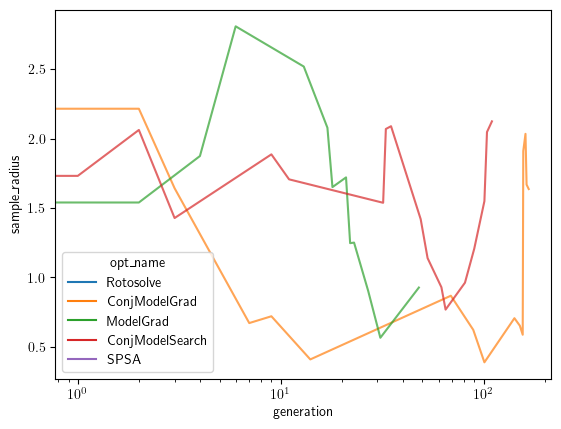

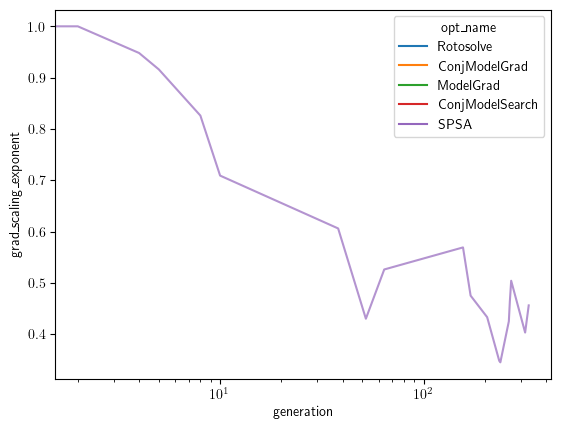

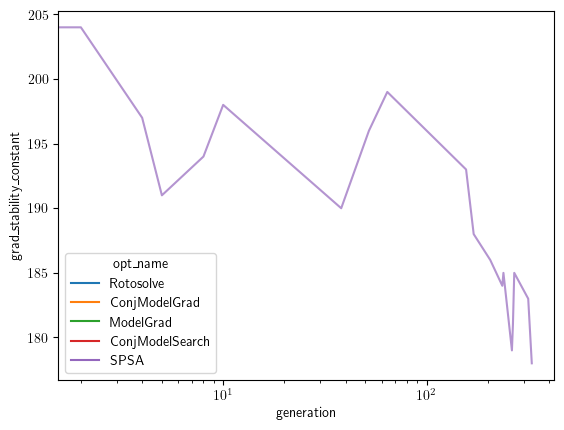

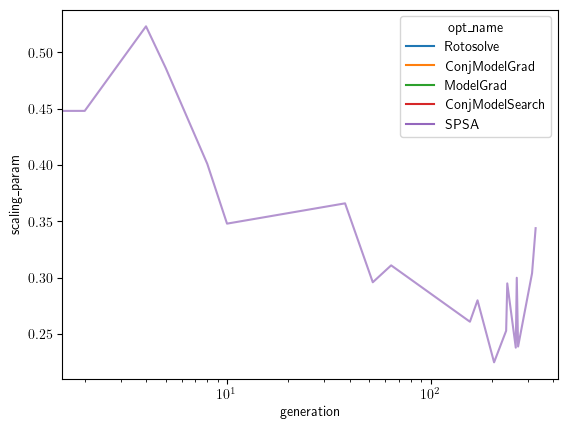

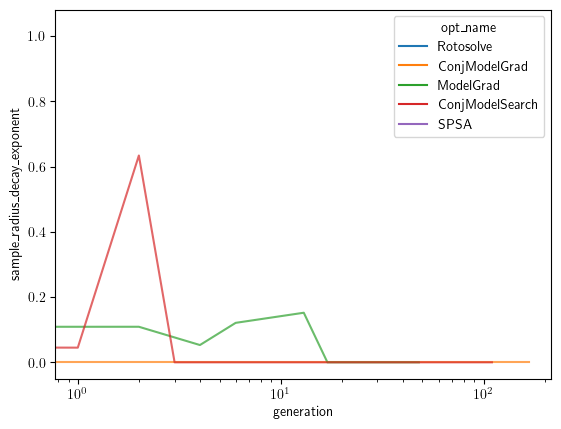

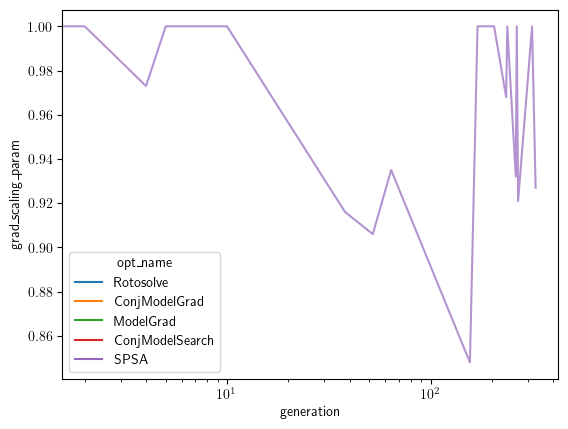

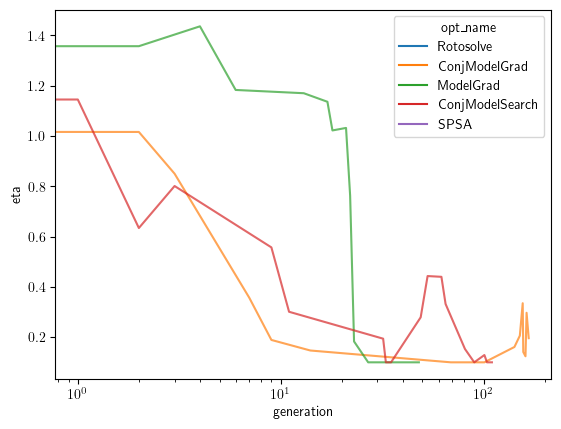

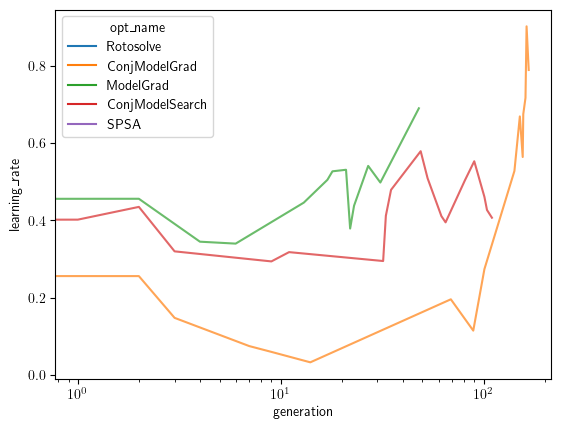

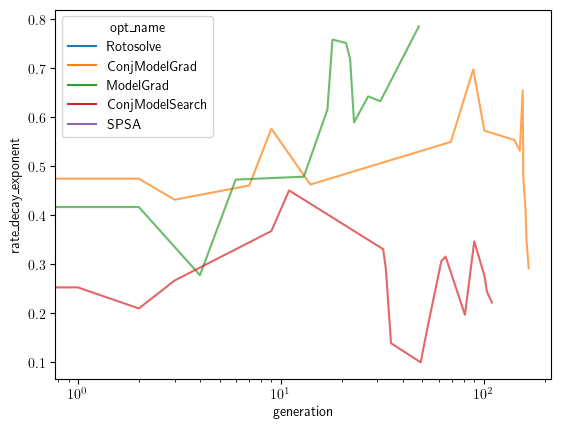

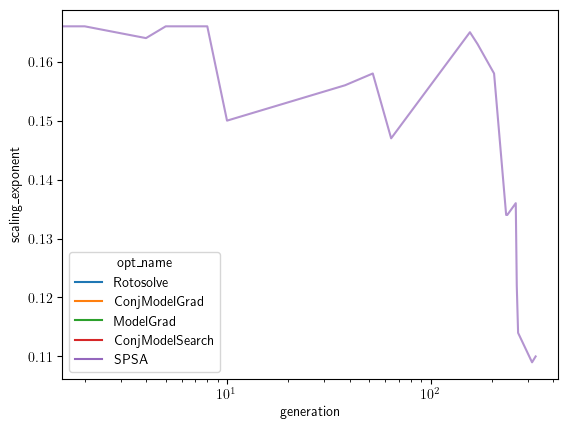

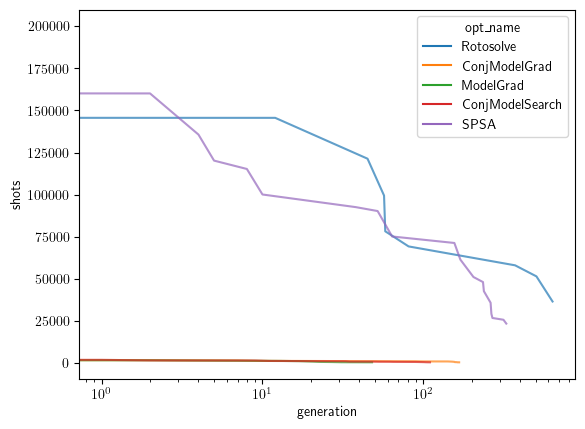

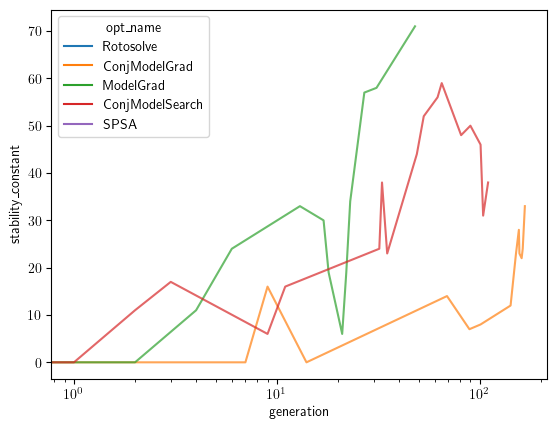

In [373]:

plot_kwargs = {
    'markers':True,
    'alpha':0.7,
    #'units':'optimizer_run',
    #'estimator':None,
    }
palette_colors = sns.color_palette('tab10')

#opt_list = ['ModelGrad', 'ConjModelGrad', 'ConjModelSearch']
#for opt in data['optimizer'].unique():
for hyper_param in unique_hyper_params:
        ax = sns.lineplot(
            data=data,
            y=hyper_param, 
            x='generation', 
            hue='opt_name',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
            **plot_kwargs
            )
        ax.set(xscale="log")
        plt.show()

/tmp/ipykernel_453/3009927600.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(ylim=(0.,100))


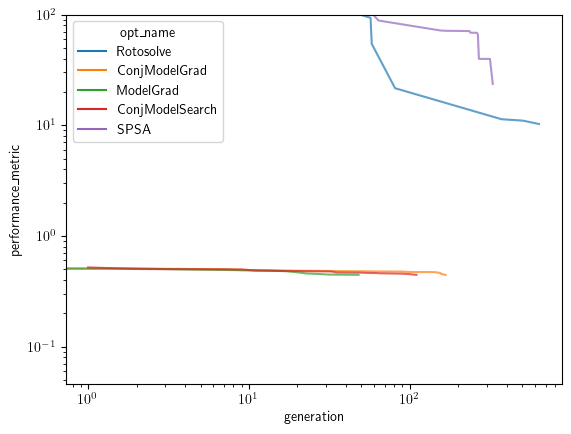

In [374]:
palette_colors = sns.color_palette('tab10')

ax = sns.lineplot(
        data=data,#filtdata,
        y='performance_metric', 
        x='generation', 
        hue='opt_name',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
        **plot_kwargs
        )
ax.set(yscale="log")
ax.set(xscale="log")
ax.set(ylim=(0.,100))
plt.show()

## device shot noise

In [237]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
#import openfermion as of
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import covvqetools as cov

plt.rcParams.update({
  "text.usetex": True,
  #"font.family": "Helvetica"
})

notebook_path = os.path.dirname(os.path.realpath("__file__"))
#data_dir = notebook_path+'/optimizer_plot_data/optimizer_few_gens/rg_nact4/'
data_dir = notebook_path+'/optimizer_plot_data/optimizer_many_gens/rg_nact4/device_noise'
data = pd.read_json(data_dir+'/all_data.json')

In [238]:
for name in data.opt_name.dropna().unique():
    print('Optimizer {} \n'.format(name), data[data['opt_name']==name].accepted_hyper_params.iloc[-1], '\n')

Optimizer Rotosolve 
 {'shots': 500} 

Optimizer ModelGrad 
 {'sample_radius': 0.707, 'learning_rate': 0.535, 'stability_constant': 30, 'eta': 0.1, 'sample_radius_decay_exponent': 1.039, 'rate_decay_exponent': 0.1, 'shots': 500} 

Optimizer ConjModelGrad 
 {'sample_radius': 0.1, 'learning_rate': 1.057, 'stability_constant': 0, 'eta': 0.1, 'sample_radius_decay_exponent': 0.18, 'rate_decay_exponent': 0.488, 'shots': 500} 

Optimizer SPSA 
 {'scaling_param': 0.5730000000000001, 'scaling_exponent': 0.117, 'grad_scaling_param': 0.752, 'grad_scaling_exponent': 0.327, 'grad_stability_constant': 205, 'shots': 32923} 

Optimizer ConjModelSearch 
 {'sample_radius': 0.29, 'learning_rate': 0.52, 'stability_constant': 47, 'eta': 0.326, 'sample_radius_decay_exponent': 2.482, 'rate_decay_exponent': 0.674, 'shots': 500} 



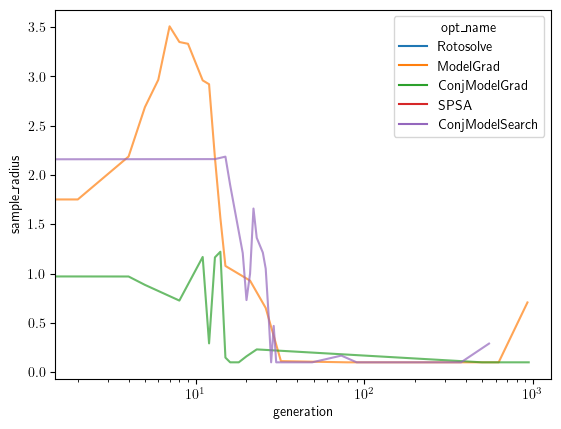

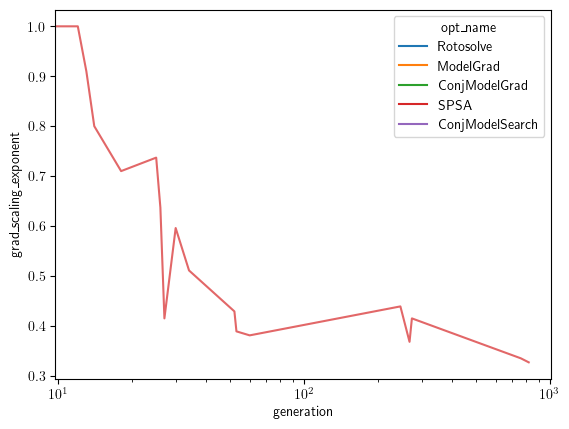

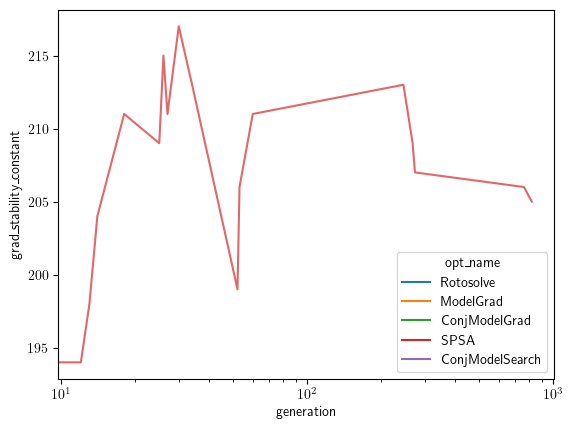

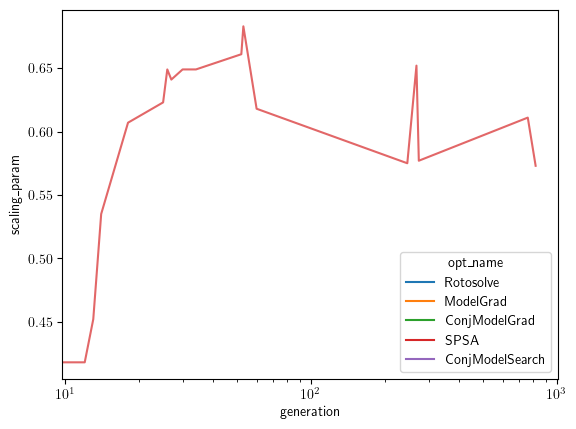

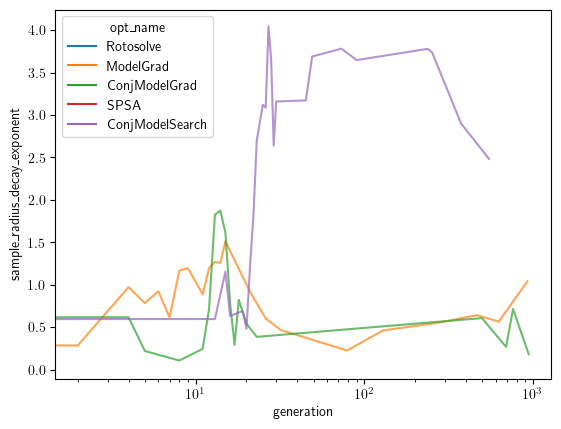

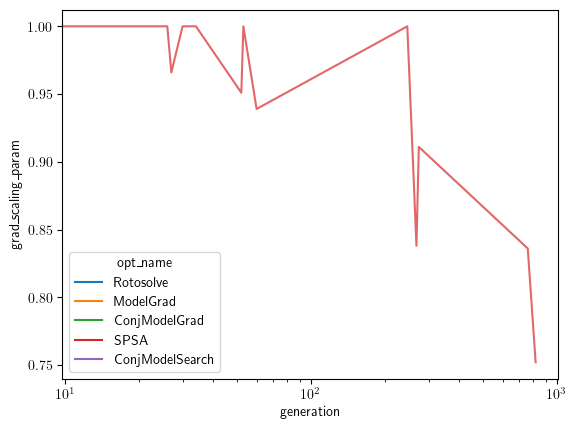

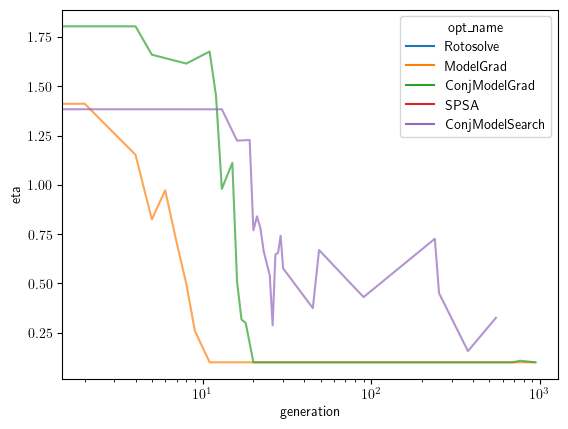

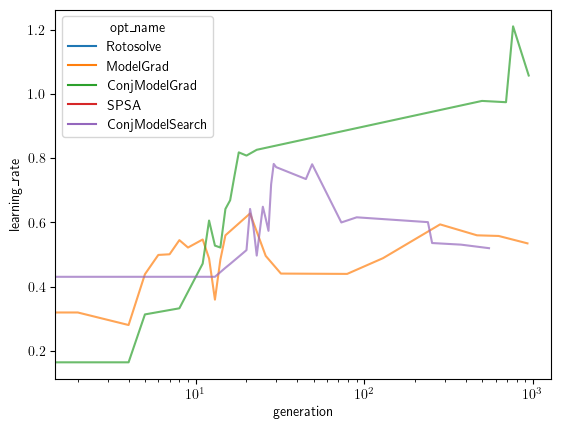

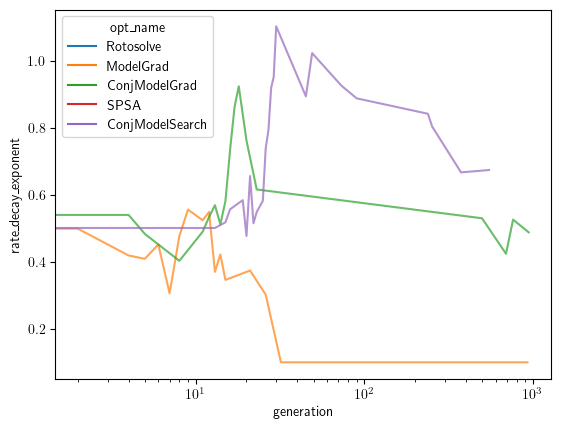

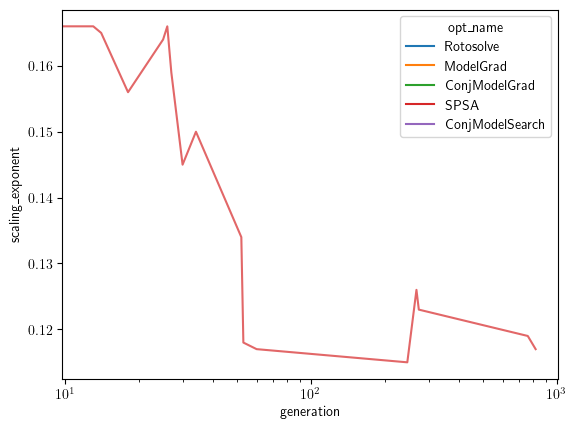

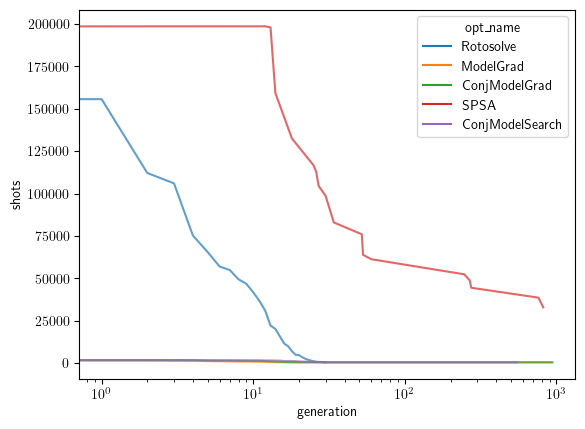

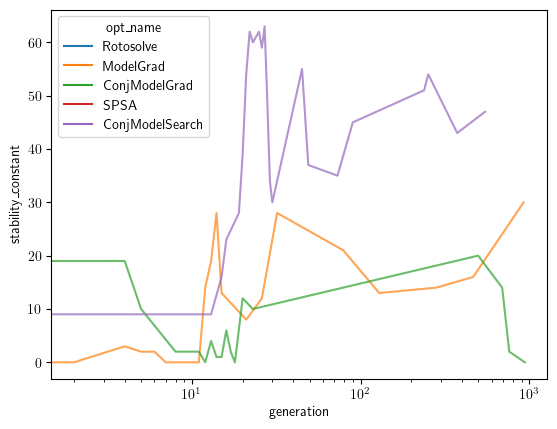

In [376]:

plot_kwargs = {
    'markers':True,
    'alpha':0.7,
    #'units':'optimizer_run',
    #'estimator':None,
    }
palette_colors = sns.color_palette('tab10')

#opt_list = ['ModelGrad', 'ConjModelGrad', 'ConjModelSearch']
#for opt in data['optimizer'].unique():
for hyper_param in unique_hyper_params:
        ax = sns.lineplot(
            data=data,
            y=hyper_param, 
            x='generation', 
            hue='opt_name',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
            **plot_kwargs
            )
        ax.set(xscale="log")
        plt.show()

/tmp/ipykernel_453/3009927600.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(ylim=(0.,100))


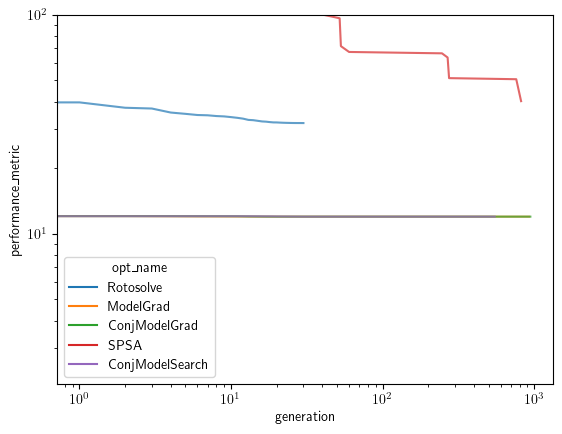

In [377]:
palette_colors = sns.color_palette('tab10')

ax = sns.lineplot(
        data=data,#filtdata,
        y='performance_metric', 
        x='generation', 
        hue='opt_name',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
        **plot_kwargs
        )
ax.set(yscale="log")
ax.set(xscale="log")
ax.set(ylim=(0.,100))
plt.show()

## fake shot noise

In [378]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
#import openfermion as of
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import covvqetools as cov

plt.rcParams.update({
  "text.usetex": True,
  #"font.family": "Helvetica"
})

notebook_path = os.path.dirname(os.path.realpath("__file__"))
#data_dir = notebook_path+'/optimizer_plot_data/optimizer_few_gens/rg_nact4/'
data_dir = notebook_path+'/optimizer_plot_data/optimizer_many_gens/rg_nact4/fake_noise'
data = pd.read_json(data_dir+'/all_data.json')

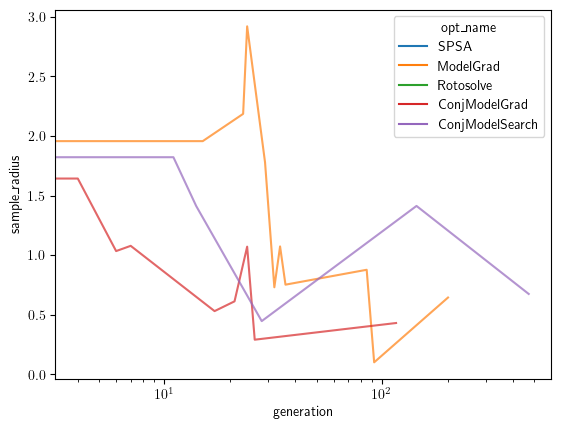

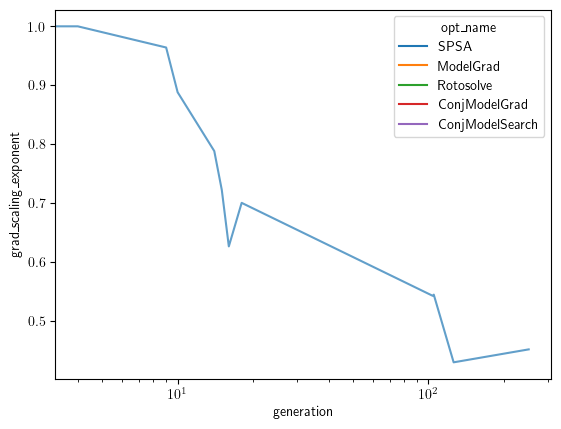

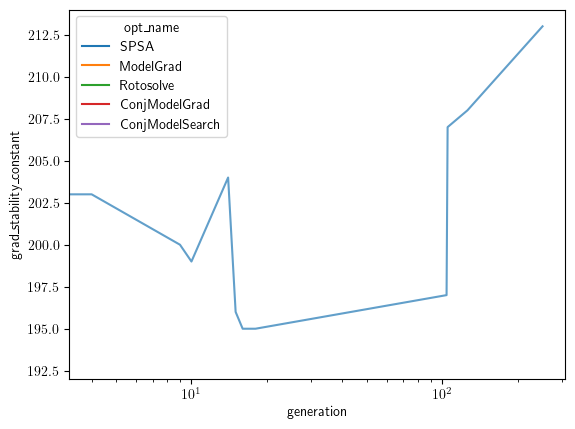

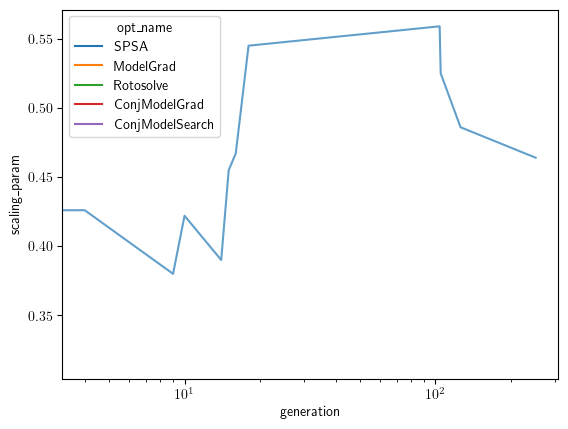

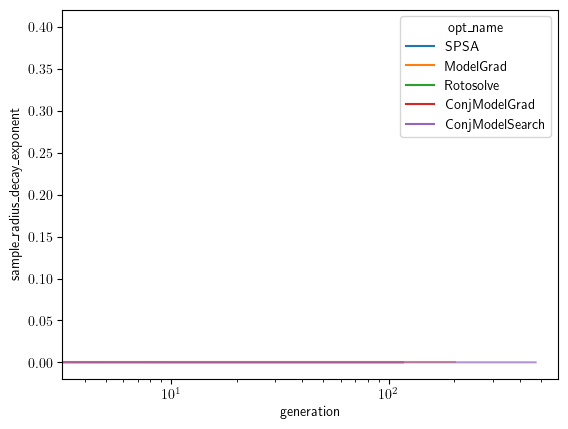

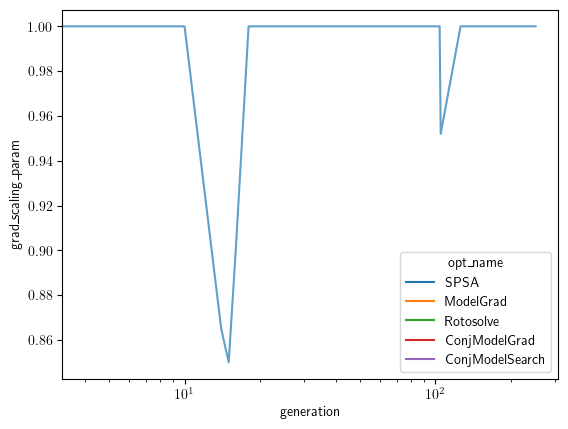

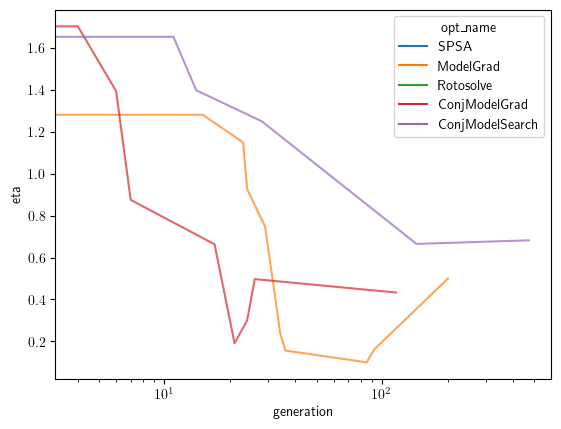

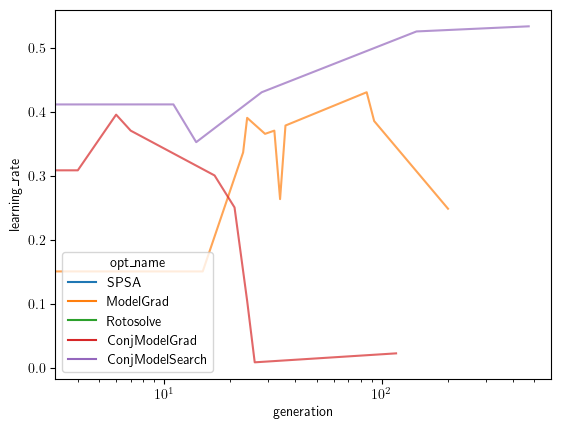

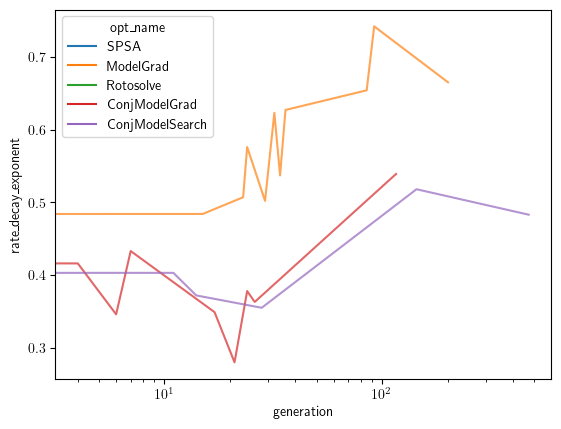

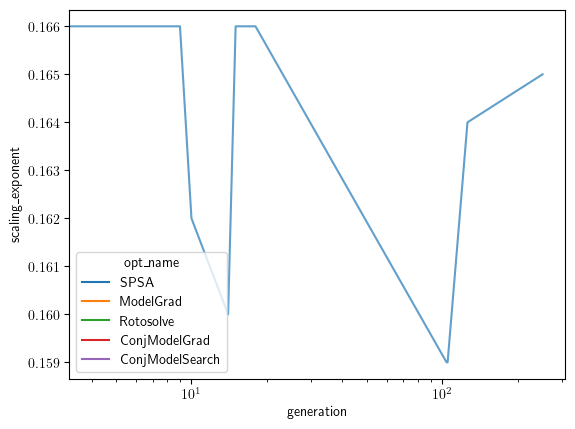

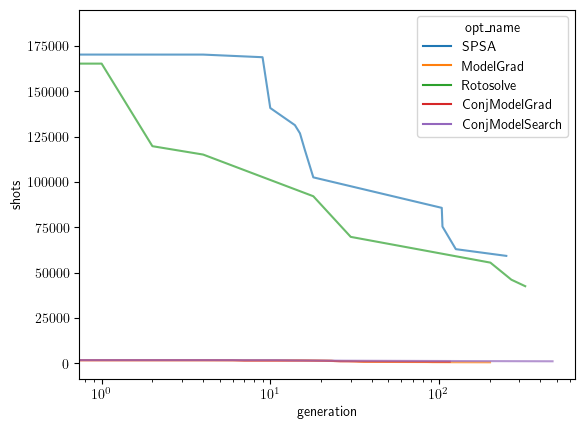

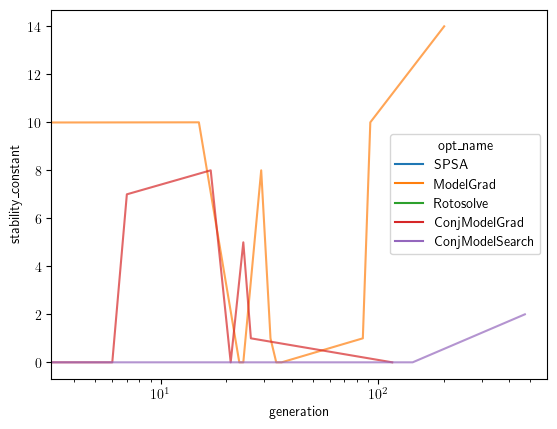

In [379]:

plot_kwargs = {
    'markers':True,
    'alpha':0.7,
    #'units':'optimizer_run',
    #'estimator':None,
    }
palette_colors = sns.color_palette('tab10')


#opt_list = ['ModelGrad', 'ConjModelGrad', 'ConjModelSearch']
#for opt in data['optimizer'].unique():
for hyper_param in unique_hyper_params:
        ax = sns.lineplot(
            data=data,
            y=hyper_param, 
            x='generation', 
            hue='opt_name',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
            **plot_kwargs
            )
        ax.set(xscale="log")
        ax.set_xlabel(r'$\textrm{Hyperparameter Generation}$')
        plt.show()

/tmp/ipykernel_453/3009927600.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(ylim=(0.,100))


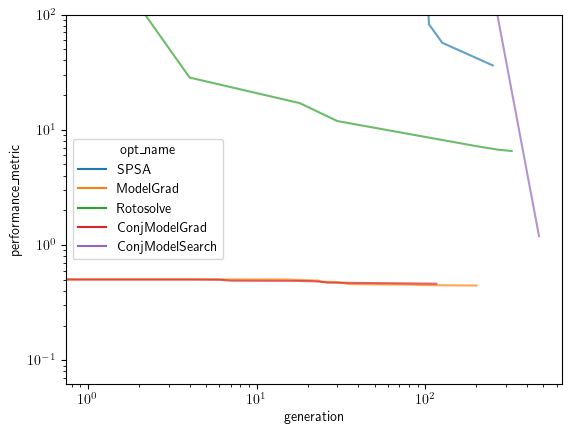

In [380]:
palette_colors = sns.color_palette('tab10')

ax = sns.lineplot(
        data=data,#filtdata,
        y='performance_metric', 
        x='generation', 
        hue='opt_name',
            #style='optimizer',
            #units='optimizer_run',
            #hue_order=hue_order,
            #palette=palette_dict,
            #err_style='band',
        **plot_kwargs
        )
ax.set(yscale="log")
ax.set(xscale="log")
ax.set(ylim=(0.,100))
plt.show()

# Performance comparison

## no noise

In [139]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
#import openfermion as of
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#import covvqetools as cov

plt.rcParams.update({
  "text.usetex": True,
  #"font.family": "Helvetica"
})

notebook_path = os.path.dirname(os.path.realpath("__file__"))
#data_dir = notebook_path+'/optimizer_plot_data/optimizer_few_gens/rg_nact4/'
#data_dir = notebook_path+'/optimizer_plot_data/optimization_comparison/no_noise'

#before and after comparison
#data_dir = notebook_path+'/optimizer_hp_comparison_data/rg4_to_4/hyperparam_scaling_comparison_rg4_to_rg4_v17_68177196'

#noiseless
#data_dir = notebook_path+'/optimizer_hp_comparison_data/rg4_to_6/hyperparam_scaling_comparison_rg4_to_rg6_v16_68175211'
#data_dir = notebook_path+'/optimizer_hp_comparison_data/rg4_to_8/hyperparam_scaling_comparison_rg4_to_rg8_v15_68175210'
#data_dir = notebook_path+'/optimizer_hp_comparison_data/rg4_to_10/hyperparam_scaling_comparison_rg4_to_rg10_v14_68175209'

#fake noise
#data_dir = notebook_path+'/optimizer_hp_comparison_data/rg4_to_6/hyperparam_scaling_comparison_rg4_to_rg6_fake_noise_v19_68180690'
#data_dir = notebook_path+'/optimizer_hp_comparison_data/rg4_to_6/hyperparam_scaling_comparison_rg4_to_rg6_fake_noise_v22_68223608'

data_dir = notebook_path+'/optimizer_hp_comparison_data/rg4_to_8/hyperparam_scaling_comparison_rg4_to_rg8_fake_noise_v20_68180691'
#data_dir = notebook_path+'/optimizer_hp_comparison_data/rg4_to_10/hyperparam_scaling_comparison_rg4_to_rg10_fake_noise_v21_68180692'

data = pd.read_json(data_dir+'/all_data.json')

In [140]:
data[data['optimizer']=='Rotosolve']
true_cost=data.true_optimal_cost.dropna().unique()[0]
mod_cost=true_cost+0.05*true_cost
data.optimizer.dropna().unique()

array(['ConjModelGrad', 'ModelGrad', 'SPSA', 'Rotosolve',
       'ConjModelSearch'], dtype=object)

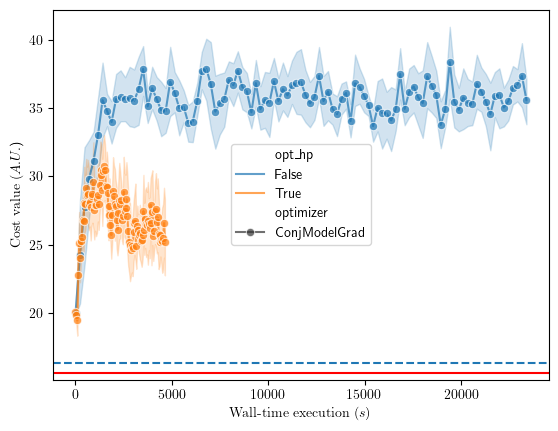

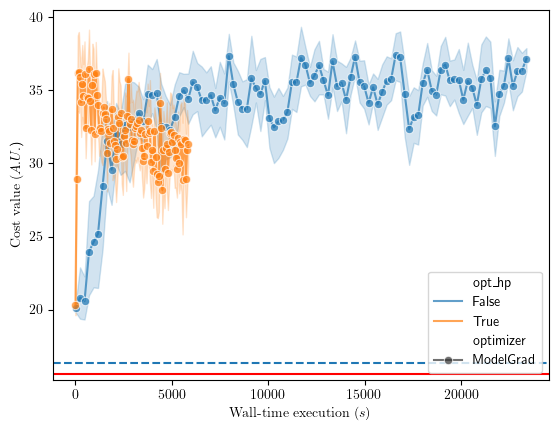

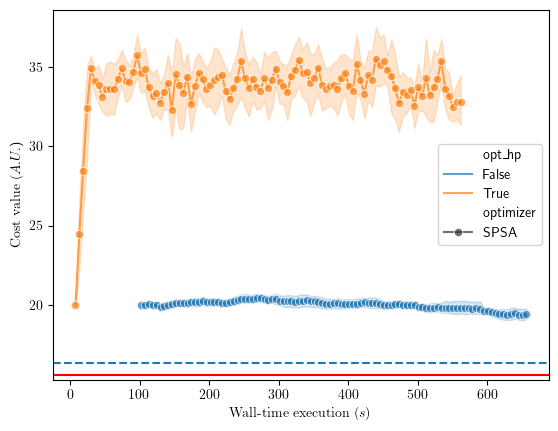

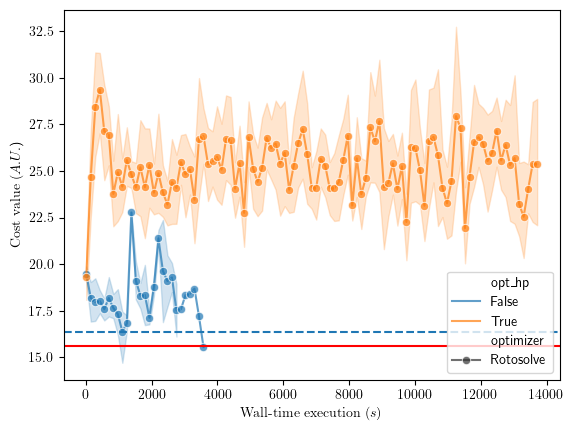

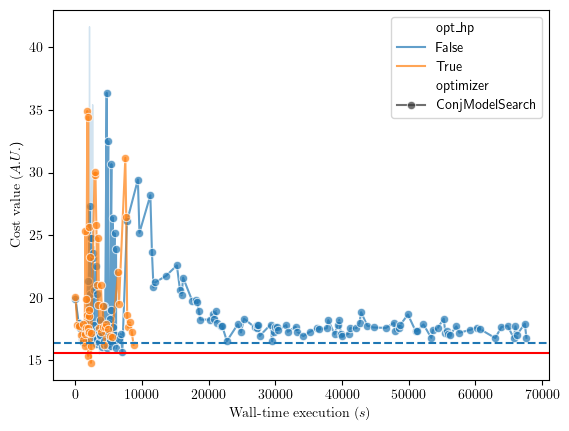

In [141]:
plot_kwargs = {
    'markers':True,
    'alpha':0.7,
    #'units':'optimizer_run',
    #'estimator':None,
    }
palette_colors = sns.color_palette('tab10')
#optimal_cost= data['optimal_cost'].iloc[-1]
for opt in data.optimizer.dropna().unique():
    filt_data = data[data['optimizer']==opt]
    ax = sns.lineplot(
        data=filt_data,
        y='cost_value', 
        x='wall_time_execution', 
        #x='epoch',
        #hue='hyper_params_hash',
        hue='opt_hp',
        style='optimizer',
        #units='optimizer_run',
        #hue_order=hue_order,
        #palette=palette_dict,
        #err_style='band',
        **plot_kwargs
        )
    #ax.set(xscale="log")
    #ax.set(yscale="log")
    # plt.axhline(y=optimal_cost)
    plt.axhline(y=mod_cost, linestyle='--', label='Optimization cutoff')
    plt.axhline(y=true_cost, color='r',label='Exact solution')
    ax.set_ylabel(r'$\textrm{Cost value }(A.U.$)')
    ax.set_xlabel(r'$\textrm{Wall-time execution }(s)$')
    
    plt.show()

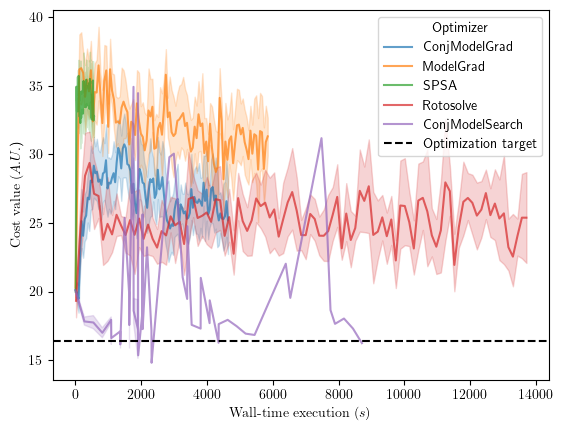

In [147]:
ax = sns.lineplot(
        data=data[data['opt_hp']==True],
        y='cost_value',
        x='wall_time_execution', 
        #x='epoch',
        hue='optimizer',
        #style='opt_hp',
        #units='optimizer_run',
        #hue_order=hue_order,
        #palette=palette_dict,
        #err_style='band',
        **plot_kwargs
        )
    #ax.set(xscale="log")
    #ax.set(yscale="log")
# plt.axhline(y=optimal_cost)
plt.axhline(y=mod_cost, linestyle='--', color='k',label='Optimization target')
#plt.axhline(y=true_cost)
ax.set_ylabel(r'$\textrm{Cost value }(A.U.$)')
ax.set_xlabel(r'$\textrm{Wall-time execution }(s)$')
ax.legend(title='Optimizer')
from pathlib import Path
out_path=notebook_path+"/optimizer_hp_comparison_plots/"+"opt_comparison_cv_over_walltime_rg4_to_8.pdf"
Path(out_path).parent.mkdir(parents=True, exist_ok=True)
plt.savefig(out_path)
plt.show()

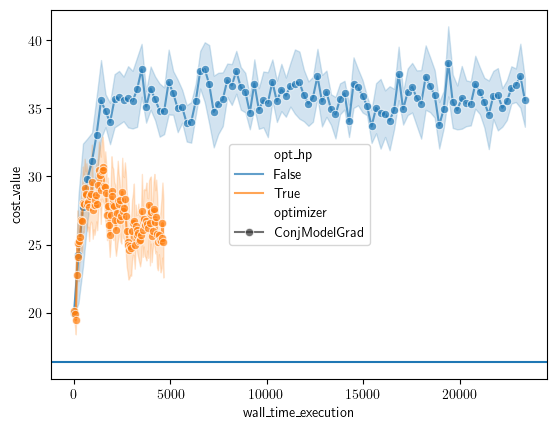

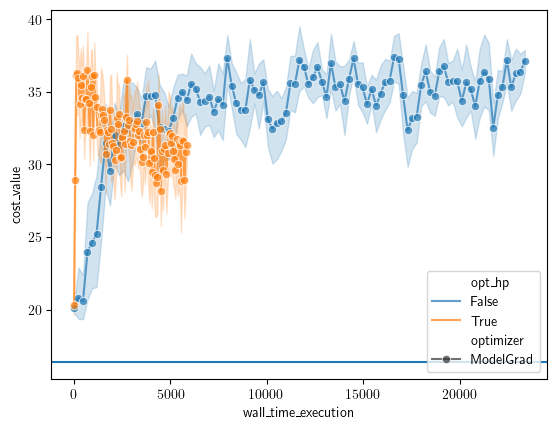

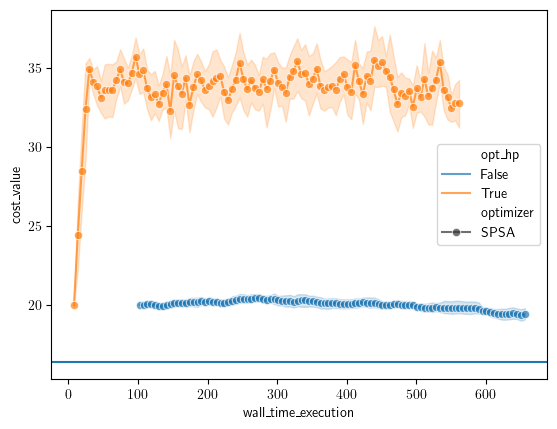

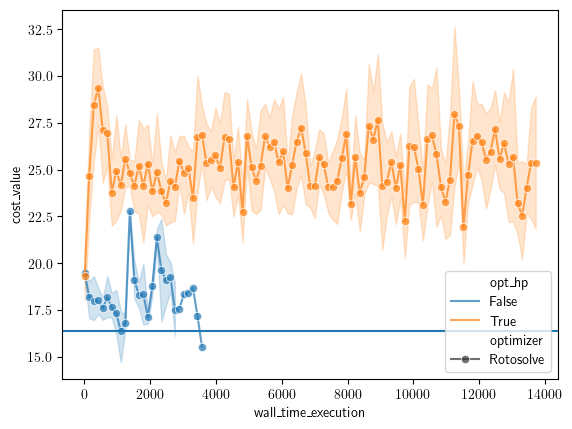

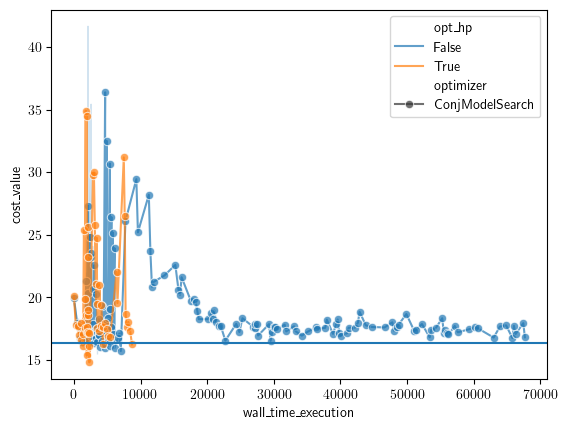

In [143]:
plot_kwargs = {
    'markers':True,
    'alpha':0.7,
    #'units':'optimizer_run',
    #'estimator':None,
    }
palette_colors = sns.color_palette('tab10')
#optimal_cost= data['optimal_cost'].iloc[-1]
for opt in data.optimizer.dropna().unique():
    filt_data = data[data['optimizer']==opt]
    ax = sns.lineplot(
        data=filt_data,
        y='cost_value', 
        x='wall_time_execution', 
        hue='opt_hp',
        #hue='hyper_params_hash',
        style='optimizer',
        #units='optimizer_run',
        #hue_order=hue_order,
        #palette=palette_dict,
        #err_style='band',
        **plot_kwargs
        )
    #ax.set(xscale="log")
    #ax.set(yscale="log")
    #plt.axhline(y=optimal_cost)
    plt.axhline(y=mod_cost)
    plt.show()

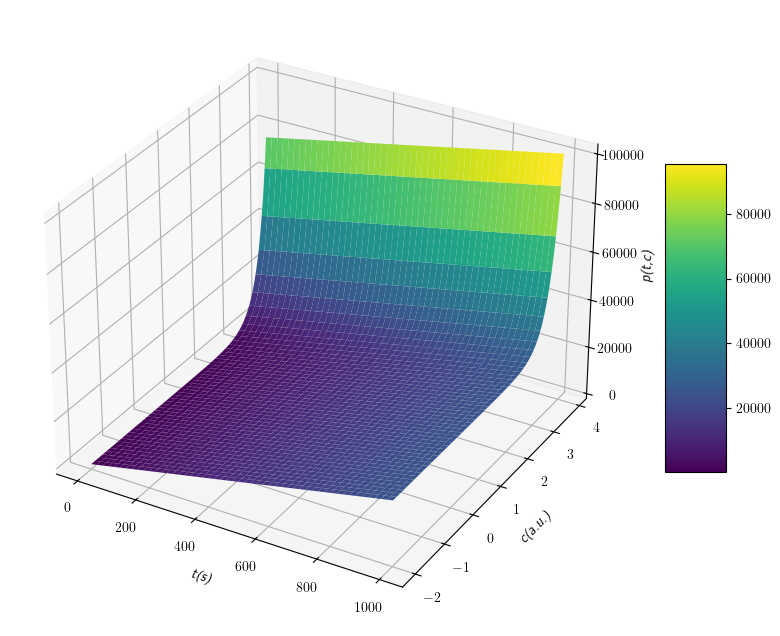

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({
  "text.usetex": True,
  #"font.family": "Helvetica"
})

# Constants
a = 25
b = 3
epsilon = 0.1

# Function definition from the image
def p_function(t, c):
    return a * t + np.heaviside(c - (0 + np.abs(epsilon)),1)*np.exp(b * (c - (0 + np.abs(epsilon))))

# Generate mesh grid for t and c
t_vals = np.linspace(0, 1000, 400)
c_vals = np.linspace(-2, 3.85, 100)
T, C = np.meshgrid(t_vals, c_vals)

# Compute p for each t, c
P = p_function(T, C)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(T, C, P, cmap='viridis')

# Labels and title
ax.set_xlabel('\\textit{t(s)}')
ax.set_ylabel('\\textit{c(a.u.)')
ax.set_zlabel('\\textit{p(t,c)}')
#ax.set_title('3D Plot of performance metric')

# Add color bar for the surface plot
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show plot
from pathlib import Path
import os
notebook_path = os.path.dirname(os.path.realpath("__file__"))
out_path=notebook_path+"/optimizer_plot_outputs/performance_metric_behavior.pdf"
Path(out_path).parent.mkdir(parents=True, exist_ok=True)
plt.savefig(out_path)

plt.show()